### **Machine Learning and Content analytics**

#### **Project:** Demographical Characteristics’ Detection (Gender, Age and Ethnicity using Image Classification

### Uncolored dataset notebook

**Professors:** Haris Papageorgiou, Georgios Perakis

**Students:**
* Mandyli Chrysoula – Charikleia (F2822106)
* Papaloukas Ioannis (F2822110)
* Papidaki Christina (F2822111)
* Taklakoglou – Chidiroglou Argyrios (F2822114)



Concerning the analysis conducted in the specific notebook, image-data from the Uncolored dataset has been used.

NOTEBOOK CONTENTS:
- Data loading and overview
  - Plotting some pictures
  - Creating age groups
  - Dεscriptive statistics -EDA
- Data processing/annotation/normalization
  - Creating dictionaries with the labels of the classes
  - Data normalization
  - Reshape
  - Splitting and one hote encoding (for the multioutput and single-output models)
- Algorithms, NLP, Architectures/Systems
  - Multioutput model
    - Set up/Configuration
    - Model Evaluation
    - Model Predictions
    - Confusion Matrix and Evaluation metrics
    - Comparison of actual and predicted values
  - Single-output models 
  (Set up/Configuration, Model Evaluation, Model Predictions, Confusion Matrix  and Evaluation metrics)
    - Gender detection (Model 1, Model 2, Model 3)
    - Ethnicity detection (Model 4, Model 5, Model 6)
    - Age detection (Model 7, Model 8, Model 9)
    - Sum up of the Best models' results (one per each feature prediction)



**IMPORTING LIBRARIES**

In [ ]:
pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, experimental, MaxPool2D, BatchNormalization,InputLayer
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot


In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import backend as K
from keras.layers.core import Lambda
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import load_img
#from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report #evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
import math

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
#from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adadelta, Adam
from typing import Tuple, List, Dict

%matplotlib notebook
%pylab inline

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Data augmentation
# import shutil
# from tqdm import tqdm
# #import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Hyperparameters tunning  
!pip install -q -U keras-tuner
import keras_tuner as kt

In [ ]:
pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**DATA COLLECTION**

In [ ]:
# Connecting to google drive for loading the dataset.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1ZtKJvuh1VkInXm4WpleLjumBq87Uh157/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('age_gender.csv') 


In [ ]:
#from keras.layers import Input
import argparse
#from keras.utils.data_utils import get_file
#import face_recognition εβγαζε error


In [ ]:
# SAVE AND LOAD MODELS 
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# splitting in train-validation-test sets in a stratified manner.

**DATASET OVERVIEW**

In [ ]:
df = pd.read_csv('age_gender.csv')
print(df)

       age  ethnicity  gender                        img_name  \
0        1          2       0  20161219203650636.jpg.chip.jpg   
1        1          2       0  20161219222752047.jpg.chip.jpg   
2        1          2       0  20161219222832191.jpg.chip.jpg   
3        1          2       0  20161220144911423.jpg.chip.jpg   
4        1          2       0  20161220144914327.jpg.chip.jpg   
...    ...        ...     ...                             ...   
23700   99          0       1  20170120221920654.jpg.chip.jpg   
23701   99          1       1  20170120134639935.jpg.chip.jpg   
23702   99          2       1  20170110182418864.jpg.chip.jpg   
23703   99          2       1  20170117195405372.jpg.chip.jpg   
23704   99          0       1  20170110182052119.jpg.chip.jpg   

                                                  pixels  
0      129 128 128 126 127 130 133 135 139 142 145 14...  
1      164 74 111 168 169 171 175 182 184 188 193 199...  
2      67 70 71 70 69 67 70 79 90 103 116 

In [ ]:
images = df['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))

Plotting some pictures

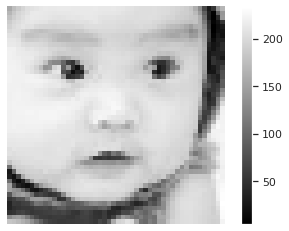

In [ ]:
plt.imshow(images[100], cmap='gray')
plt.axis('off')
plt.colorbar()

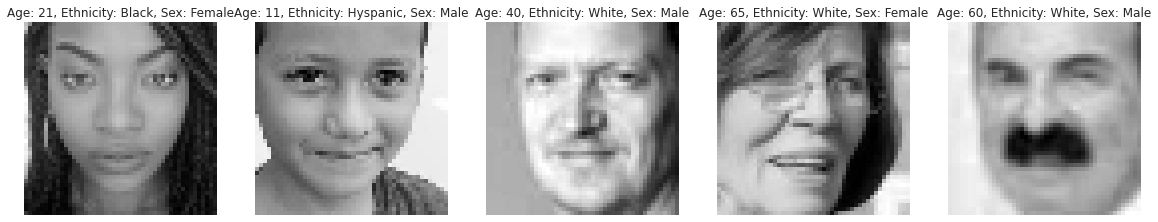

In [ ]:
# Plotting some pictures and their features
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    random_face = np.random.choice(len(df))

    age = df['age'][random_face]
    ethnicity = df['ethnicity'][random_face]
    gender = df['gender'][random_face]

    if (gender == 0):
      gender = "Male" 
    else:
      gender = "Female"
    
    if (ethnicity==0):
       ethnicity = "White"
    elif (ethnicity==1):
       ethnicity = "Black"
    elif (ethnicity==2):
       ethnicity = "Asian"
    elif (ethnicity==3):
       ethnicity = "Indian"
    else:
       ethnicity = "Hyspanic"
    
    axes[i].set_title('Age: {0}, Ethnicity: {1}, Sex: {2}'.format(age, ethnicity, gender))
    axes[i].imshow(images[random_face], cmap='gray')
    axes[i].axis('off')

In [ ]:
# gender: binary 0,1
# ethnicity: 0,1,2,3,4
# age: from 1 to 116

Creating age groups

In [ ]:
bins= [0,11,19,30,41,55,68,117]
labels = ['0-10','11-18','19-29','30-40','41-54','55-67','68+']
df['Age_Groups'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
#new shape
df.shape

(23705, 6)

In [ ]:
df.head()

,age,ethnicity,gender,img_name,pixels,Age_Groups
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0-10
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0-10
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0-10
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...,0-10
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...,0-10


Descriptive statictics - EDA

In [ ]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         23705 non-null  int64   
 1   ethnicity   23705 non-null  int64   
 2   gender      23705 non-null  int64   
 3   img_name    23705 non-null  object  
 4   pixels      23705 non-null  object  
 5   Age_Groups  23705 non-null  category
dtypes: category(1), int64(3), object(2)
memory usage: 949.6+ KB


In [ ]:
df[df['age']>100]

,age,ethnicity,gender,img_name,pixels,Age_Groups
1290,101,2,1,20170105174739309.jpg.chip.jpg,222 222 223 222 218 195 130 81 222 241 233 236...,68+
1291,101,0,0,20170112213500903.jpg.chip.jpg,183 184 177 174 172 165 169 172 174 178 168 17...,68+
1292,103,2,0,20170112213001988.jpg.chip.jpg,195 248 124 87 86 33 57 67 53 56 53 54 43 44 4...,68+
1293,105,0,1,20170112213507183.jpg.chip.jpg,103 113 125 124 129 120 119 120 129 132 139 12...,68+
1294,105,0,1,20170112213021902.jpg.chip.jpg,251 250 251 251 250 244 226 210 192 166 162 15...,68+
1295,105,1,1,20170112213303693.jpg.chip.jpg,187 171 158 187 196 198 198 193 175 155 168 19...,68+
1296,105,0,0,20170112213001988.jpg.chip.jpg,161 115 157 145 165 203 154 137 150 153 160 12...,68+
1297,105,0,1,20170112213001988.jpg.chip.jpg,175 172 159 148 144 135 134 126 124 133 131 12...,68+
1363,110,1,1,20170110155201038.jpg.chip.jpg,38 38 39 38 39 92 12 11 43 52 47 36 19 23 20 2...,68+
1364,110,0,0,20170112213500903.jpg.chip.jpg,35 60 66 67 78 173 183 173 157 153 154 158 156...,68+


In [ ]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [ ]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [ ]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [ ]:
df['Age_Groups'].value_counts()

19-29    7442
30-40    5062
0-10     3218
41-54    3064
55-67    2114
68+      1528
11-18    1277
Name: Age_Groups, dtype: int64

Text(0.5, 1.0, 'Total observations per Age')

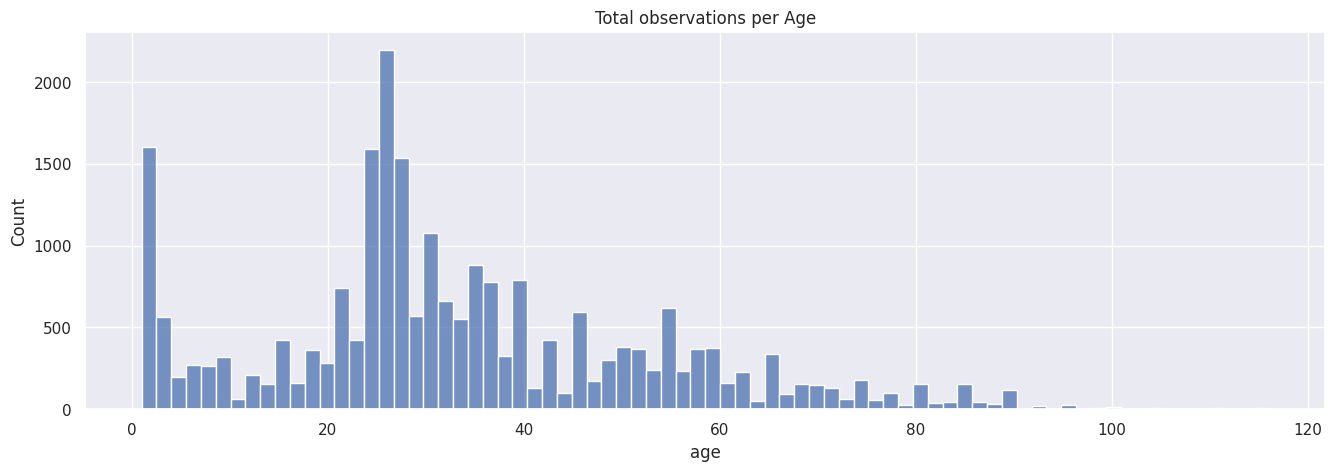

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5), dpi=100)
plot1 = sns.histplot(data=df['age'], ax=ax)
plt.title("Total observations per Age")

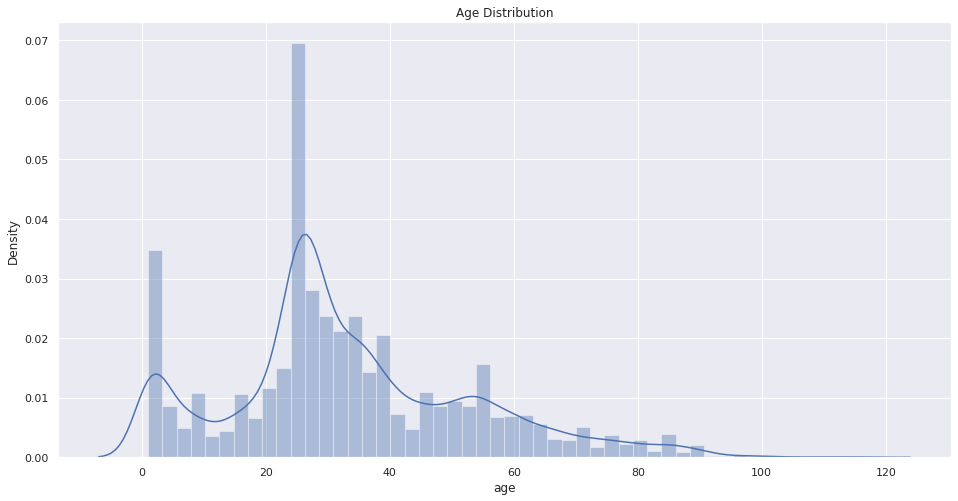

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

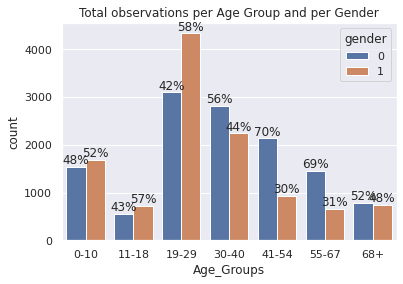

<Figure size 1008x504 with 0 Axes>

In [ ]:
#function that calculate the percentages between Males and Females for each Age_Group:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")


#The plot:
sns.set()
ax = sns.countplot(x=df.Age_Groups, hue=df.gender)
ax.set_title("Total observations per Age Group and per Gender")
plt.figure(figsize=(14,7))
barPerc(df, 'Age_Groups', ax)
plt.show();

Text(0.5, 1.0, 'Total observations per Gender')

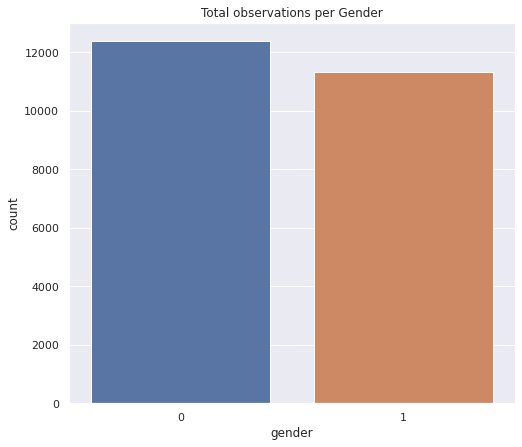

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(df['gender'])
plt.title("Total observations per Gender")

Text(0.5, 1.0, 'Total observations per Ethnicity')

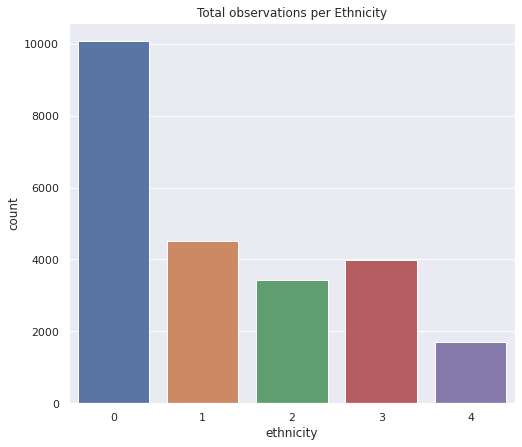

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(df['ethnicity'])
plt.title("Total observations per Ethnicity")

**DATA PROCESSING/ANNOTATION/NORMALIZATION**

Ensuring that every row in the 'pixels' column of the dataset has 2304 data points

In [ ]:
lista = []
for i in range(len(df)):
  if len(df['pixels'][i])!=2304:
    lista.append(i)

lista    

[]

Creating dictionaries with the labels of the classes


In [ ]:
dataset_dict = {
    'ethnicity': {
        0: 'white', 
        1: 'black', 
        2: 'asian', 
        3: 'indian', 
        4: 'hispanic'
    },
    'gender': {
        0: 'male',
        1: 'female'
    }
}

In [ ]:
dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender'].items())
dataset_dict['ethnicity_alias'] = dict((r, i) for i, r in dataset_dict['ethnicity'].items())

In [ ]:
dataset_dict['gender_alias']

{'male': 0, 'female': 1}

In [ ]:
dataset_dict['ethnicity_alias']

{'white': 0, 'black': 1, 'asian': 2, 'indian': 3, 'hispanic': 4}

In [ ]:
# Create an array with the three variables' data before any processing

dataset = df [['age','ethnicity','gender']]
labels = []
labels = np.array(dataset, dtype='int')
labels

array([[ 1,  2,  0],
       [ 1,  2,  0],
       [ 1,  2,  0],
       ...,
       [99,  2,  1],
       [99,  2,  1],
       [99,  0,  1]])

Data Normalization

In [ ]:
df['pixels'] = df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [ ]:
# Rescaling the pixel values (between 0 and 255) to the [0, 1] interval, as neural networks prefer to deal with small input values.
df['pixels'] = df['pixels'].apply(lambda x: x/255)

In [ ]:
z=df['pixels'][0]
len(z)

2304

Reshape

In [ ]:
x = np.array(df['pixels'].tolist())
x

array([[0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
        0.57254905],
       [0.6431373 , 0.2901961 , 0.43529412, ..., 0.7137255 , 0.6666667 ,
        0.5803922 ],
       [0.2627451 , 0.27450982, 0.2784314 , ..., 0.4392157 , 0.43529412,
        0.42352942],
       ...,
       [0.23137255, 0.19607843, 0.14509805, ..., 0.38431373, 0.30588236,
        0.30588236],
       [0.1764706 , 0.42352942, 0.47058824, ..., 0.1254902 , 0.13725491,
        0.13725491],
       [0.6117647 , 0.6313726 , 0.627451  , ..., 0.74509805, 0.72156864,
        0.68235296]], dtype=float32)

In [ ]:
x = x.reshape(x.shape[0],48,48,1)

In [ ]:
X = np.array(df['pixels'].tolist())

X = X.reshape(X.shape[0],48,48,1)

X.shape

(23705, 48, 48, 1)

Data augmentation

In [ ]:
# Didn't finally used, are the uncoloured dataset was not in appropriate format
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         featurewise_center=True,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=True,  # divide inputs by std of the dataset
#         samplewise_std_normalization=True,  # divide each input by its std
#         zca_whitening=False,  # dimesion reduction
#         rotation_range=5,  # randomly rotate images in the range 5 degrees
#         zoom_range = 0.1, # Randomly zoom image 10%
#         width_shift_range=0.1,  # randomly shift images horizontally 10%
#         height_shift_range=0.1,  # randomly shift images vertically 10%
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


Splitting and one hot encoding

**For the multioutput model**

In [ ]:
# One hot encoding processing

In [ ]:
age_label = np.array([a[0] for a in labels], dtype='uint8')
eth_label = np.array([e[1] for e in labels], dtype='uint8')
gen_label = np.array([g[2] for g in labels], dtype='uint8')

In [ ]:
gen_label

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [ ]:
age_label_ohe = MinMaxScaler().fit_transform(age_label.reshape(-1, 1))
eth_label_ohe = LabelBinarizer().fit_transform(eth_label)
gen_label_ohe = LabelBinarizer().fit_transform(gen_label)
gen_label_ohe = to_categorical(gen_label_ohe)

In [ ]:
gen_label_ohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
age_label_ohe

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.85217391],
       [0.85217391],
       [0.85217391]])

In [ ]:
X_train_val, X_test, y_train_val_age, y_test_age, y_train_val_eth, y_test_eth, y_train_val_gen, y_test_gen, = train_test_split(x,
                                                                                                                               age_label_ohe, 
                                                                                                                               eth_label_ohe,
                                                                                                                               gen_label_ohe,
                                                                                                                               test_size=0.2,
                                                                                                                               stratify=eth_label_ohe, 
                                                                                                                               random_state=42)


In [ ]:
X_train, X_val, y_train_age, y_val_age, y_train_eth, y_val_eth, y_train_gen, y_val_gen, = train_test_split(X_train_val,
                                                                                                          y_train_val_age, 
                                                                                                          y_train_val_eth,
                                                                                                          y_train_val_gen,
                                                                                                          test_size=0.2,
                                                                                                          stratify=y_train_val_eth, 
                                                                                                          random_state=42)

**For the single-output models**

**AGE **

* Using one hot encoding to transform age group data to categorical.

In [ ]:
one_hot_Age_Groups = pd.get_dummies(df.Age_Groups, prefix='Age_Group')
df = df.join(one_hot_Age_Groups)

* Stratified splitting of data

In [ ]:
ya=df[['Age_Group_0-10', 'Age_Group_11-18', 'Age_Group_19-29', 'Age_Group_30-40', 'Age_Group_41-54', 'Age_Group_55-67', 'Age_Group_68+']]

In [ ]:
# Stratified splitting for Age groups
X_train_val_a, X_test_a, y_train_val_a, y_test_a = train_test_split(X,ya,
                                                            test_size=0.2,
                                                            random_state=123,
                                                            stratify=ya)

In [ ]:
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(X_train_val_a,
                                                  y_train_val_a,
                                                  test_size=0.20, 
                                                  random_state=123,
                                                  stratify=y_train_val_a)

In [ ]:
y_train_enc_a= y_train_a.to_numpy()
y_val_enc_a = y_val_a.to_numpy()
y_test_enc_a = y_test_a.to_numpy()

In [ ]:
print(f'y_train_e shape: {y_train_enc_a.shape}')
print(f'y_val_e shape: {y_val_enc_a.shape}')
print(f'y_test_e shape: {y_test_enc_a.shape}')

y_train_e shape: (15171, 7)
y_val_e shape: (3793, 7)
y_test_e shape: (4741, 7)


* Using numpy to save the X an y's in a special format that is quite easy to store and retrieve

In [ ]:
np.save('X_train_a.npy', X_train_a)
np.save('y_train_enc_a.npy', y_train_enc_a)

In [ ]:
X_train_a = np.load('X_train_a.npy')
y_train_enc_a = np.load('y_train_enc_a.npy')


* Assigning weights to classes




In [ ]:
class_totals_a = y_train_enc_a.sum(axis=0)
class_weight_a = class_totals_a.max() / class_totals_a

**GENDER **

* Stratified splitting of data

In [ ]:
yg= df['gender']

In [ ]:
# Stratified splitting for gender
X_train_val_g, X_test_g, y_train_val_g, y_test_g = train_test_split(X,yg,
                                                            test_size=0.2,
                                                            random_state=123,
                                                            stratify=yg)

In [ ]:
X_train_g, X_val_g, y_train_g, y_val_g = train_test_split(X_train_val_g,
                                                  y_train_val_g,
                                                  test_size=0.20, 
                                                  random_state=123,
                                                  stratify=y_train_val_g)

* Using one hot ecnoder to turn the variable into categorical

In [ ]:
y_enc_g = OneHotEncoder(sparse=False)

In [ ]:
y_enc_g

OneHotEncoder(sparse=False)

1) At first we run fit_transform on the Training data

In [ ]:
y_train_enc_g = y_enc_g.fit_transform(y_train_g.values.reshape(-1, 1))
y_train_enc_g

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

2) Then we use the fitted One-hot-Encoder to transform the rest of the data

In [ ]:
y_val_enc_g = y_enc_g.transform(y_val_g.values.reshape(-1, 1))
y_test_enc_g = y_enc_g.transform(y_test_g.values.reshape(-1, 1))

In [ ]:
print(f'y_train_g shape: {y_train_enc_g.shape}')
print(f'y_val_g shape: {y_val_enc_g.shape}')
print(f'y_test_g shape: {y_test_enc_g.shape}')

y_train_g shape: (15171, 2)
y_val_g shape: (3793, 2)
y_test_g shape: (4741, 2)


* Using numpy to save the X an y's in a special format that is quite easy to store and retrieve

In [ ]:
np.save('X_train_g.npy', X_train_g)
np.save('y_train_enc_g.npy', y_train_enc_g)

In [ ]:
X_train_g = np.load('X_train_g.npy')
y_train_enc_g = np.load('y_train_enc_g.npy')

* Assigning weights to classes

In [ ]:
class_totals_g = y_train_enc_g.sum(axis=0)
class_weight_g = class_totals_g.max() / class_totals_g

**ETHNICITY **

* Stratified splitting of data

In [ ]:
ye = df['ethnicity']

In [ ]:
# Stratified splitting for Ethnicity
X_train_val_e, X_test_e, y_train_val_e, y_test_e = train_test_split(X,ye,
                                                            test_size=0.2,
                                                            random_state=123,
                                                            stratify=ye)

In [ ]:
X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(X_train_val_e,
                                                  y_train_val_e,
                                                  test_size=0.20, 
                                                  random_state=123,
                                                  stratify=y_train_val_e)

* Using one hot ecnoder to turn the variable into categorical

In [ ]:
y_enc_e = OneHotEncoder(sparse=False)

1) At first we run fit_transform on the Training data

In [ ]:
y_train_enc_e = y_enc_e.fit_transform(y_train_e.values.reshape(-1, 1))
y_train_enc_e

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

2) Then we use the fitted One-hot-Encoder to transform the rest of the data

In [ ]:
y_val_enc_e = y_enc_e.transform(y_val_e.values.reshape(-1, 1))
y_test_enc_e = y_enc_e.transform(y_test_e.values.reshape(-1, 1))

In [ ]:
print(f'y_train_e shape: {y_train_enc_e.shape}')
print(f'y_val_e shape: {y_val_enc_e.shape}')
print(f'y_test_e shape: {y_test_enc_e.shape}')

y_train_e shape: (15171, 5)
y_val_e shape: (3793, 5)
y_test_e shape: (4741, 5)


* Using numpy to save the X an y's in a special format that is quite easy to store and retrieve

In [ ]:
np.save('X_train_e.npy', X_train_e)
np.save('y_train_enc_e.npy', y_train_enc_e)

In [ ]:
X_train_e = np.load('X_train_e.npy')
y_train_enc_e = np.load('y_train_enc_e.npy')


* Assigning weights to classes




In [ ]:
class_totals_e = y_train_enc_e.sum(axis=0)
class_weight_e = class_totals_e.max() / class_totals_e

In [ ]:
# SUM UP:
# There are three splits to train-validation -test dataset (test will be used as out of sample)
# 1. For gender classification, called: y_train_enc_g,  y_val_enc_g, y_test_enc_g ~ X_train_g, X_val_g, X_test_g
# 2. For ethnicity classification, called: y_train_enc_e,  y_val_enc_e, y_test_enc_e ~ X_train_e, X_val_e, X_test_e
# 3. For age classification, called: y_train_enc_a,  y_val_enc_a, y_test_enc_a ~ X_train_a, X_val_a, X_test_a

**ALGORITHMS, NLP ARCHITECTURES/SYSTEMS**

Computer vision - image classification

A) CNN
* Multioutput model (predicting 3 characteristics): ethnicity, gender, age (not buckets)
* Single-output models (predicting one feature, multiclass classification)
  - Gender (with and without hyperparameters tunner)
  - Ethnicity (with and without hyperparameters tunner)
  - Age (buckets) (using class weights and without)
  

B) RNN 
* GRU for age (buckets), gender, ethnicity


**EXPERIMENTS – SETUP, CONFIGURATION**



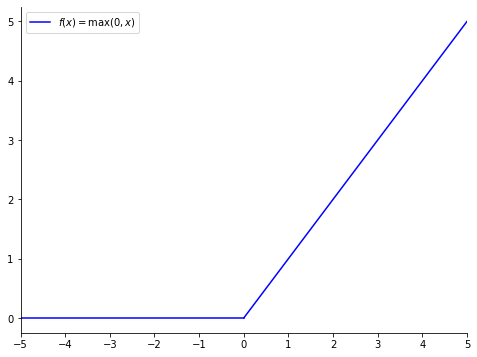

In [ ]:
# For the activation of our neurons we are going to use 
# The rectifier: 𝑓(𝑥)=𝑥+=max(0,𝑥)
# A neuron, or unit, that employs the rectifier is also called a rectified linear unit (ReLU).


fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
plt.plot(x, y, color='blue')
x = np.linspace(0, 5, 50)
y = x
relu, = plt.plot(x, y, color='blue', label=r"$f(x) = \max(0, x)$")
plt.legend(handles=[relu], loc='best')

* **Multioutput model**

In [ ]:
# Creating a class cnn with three functions each of them creating the model of the respective attribute. 
# There is a fourth function where it combines all the three functions and builds the final model.

class cnn:
    def ethnicity_model(inputs, num_classes):
        # first block
        model = Conv2D(16, (3, 3), padding="same")(inputs)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(3, 3))(model)
        model = Dropout(0.25)(model)
        # second block
        # (CONV => RELU) * 2 => POOL
        model = Conv2D(32, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(2, 2))(model)
        model = Dropout(0.25)(model)

        model = Conv2D(32, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(2, 2))(model)
        model = Dropout(0.25)(model)
        # third block
        # (CONV => RELU) * 2 => POOL
        model = Conv2D(64, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = Conv2D(64, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(2, 2))(model)
        model = Dropout(0.25)(model)
        # FC block
        model = Flatten()(model)
        model = Dense(128)(model)
        model = Activation("relu")(model)
        model = BatchNormalization()(model)
        model = Dropout(0.5)(model)
        model = Dense(num_classes)(model)
        model = Activation('softmax', name="eth_out")(model)
        return model

    def gender_model(inputs, num_classes):
        # first block
        model = Conv2D(16, (3, 3), padding="same")(inputs)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(3, 3))(model)
        model = Dropout(0.25)(model)
        # second block
        # (CONV => RELU) * 2 => POOL
        model = Conv2D(32, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(2, 2))(model)
        model = Dropout(0.25)(model)

        model = Conv2D(32, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(2, 2))(model)
        model = Dropout(0.25)(model)        
        
        # FC block
        model = Flatten()(model)
        model = Dense(128)(model)
        model = Activation('relu')(model)
        model = BatchNormalization()(model)
        model = Dropout(0.5)(model)        

        # softmax classifier
        model = Dense(num_classes)(model)
        model = Activation('sigmoid', name='gen_out')(model)

        return model

    def age_model(inputs, num_classes):
        # first block
        model = Conv2D(16, (3, 3), padding="same")(inputs)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(3, 3))(model)
        model = Dropout(0.25)(model)
        # second block
        # (CONV => RELU) * 2 => POOL
        model = Conv2D(32, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(2, 2))(model)
        model = Dropout(0.25)(model)

        model = Conv2D(32, (3, 3), padding="same")(model)
        model = Activation("relu")(model)
        model = BatchNormalization(axis=-1)(model)
        model = MaxPooling2D(pool_size=(2, 2))(model)
        model = Dropout(0.25)(model)        

        # FC block
        model = Flatten()(model)
        model = Dense(128)(model)
        model = Activation('relu')(model)
        model = BatchNormalization()(model)
        model = Dropout(0.5)(model)        
        # classifier
        model = Dense(num_classes)(model)
        model = Activation('linear', name='age_out')(model)

        return model

    def build(age_number, eth_number, gen_number):
        inputs = Input(shape=(48, 48, 1))
        age_branch = cnn.age_model(inputs=inputs, num_classes=age_number)
        ethnicity_branch = cnn.ethnicity_model(inputs=inputs, num_classes=eth_number)
        gender_branch = cnn.gender_model(inputs=inputs, num_classes=gen_number)
        model = Model(
            inputs=inputs,
            outputs=[age_branch, ethnicity_branch, gender_branch],
            name='cnn'
        )

        return model

In [ ]:
def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

In [ ]:
model = cnn.build(age_number=1, eth_number=5, gen_number=2)
model.compile(loss={'age_out': 'mean_squared_error', 'eth_out': 'categorical_crossentropy', 'gen_out': 'categorical_crossentropy'}, optimizer='adam', metrics=['mean_absolute_error', "accuracy"], loss_weights={'age_out': 8.0, 'eth_out': 2.0, 'gen_out': 1.0})

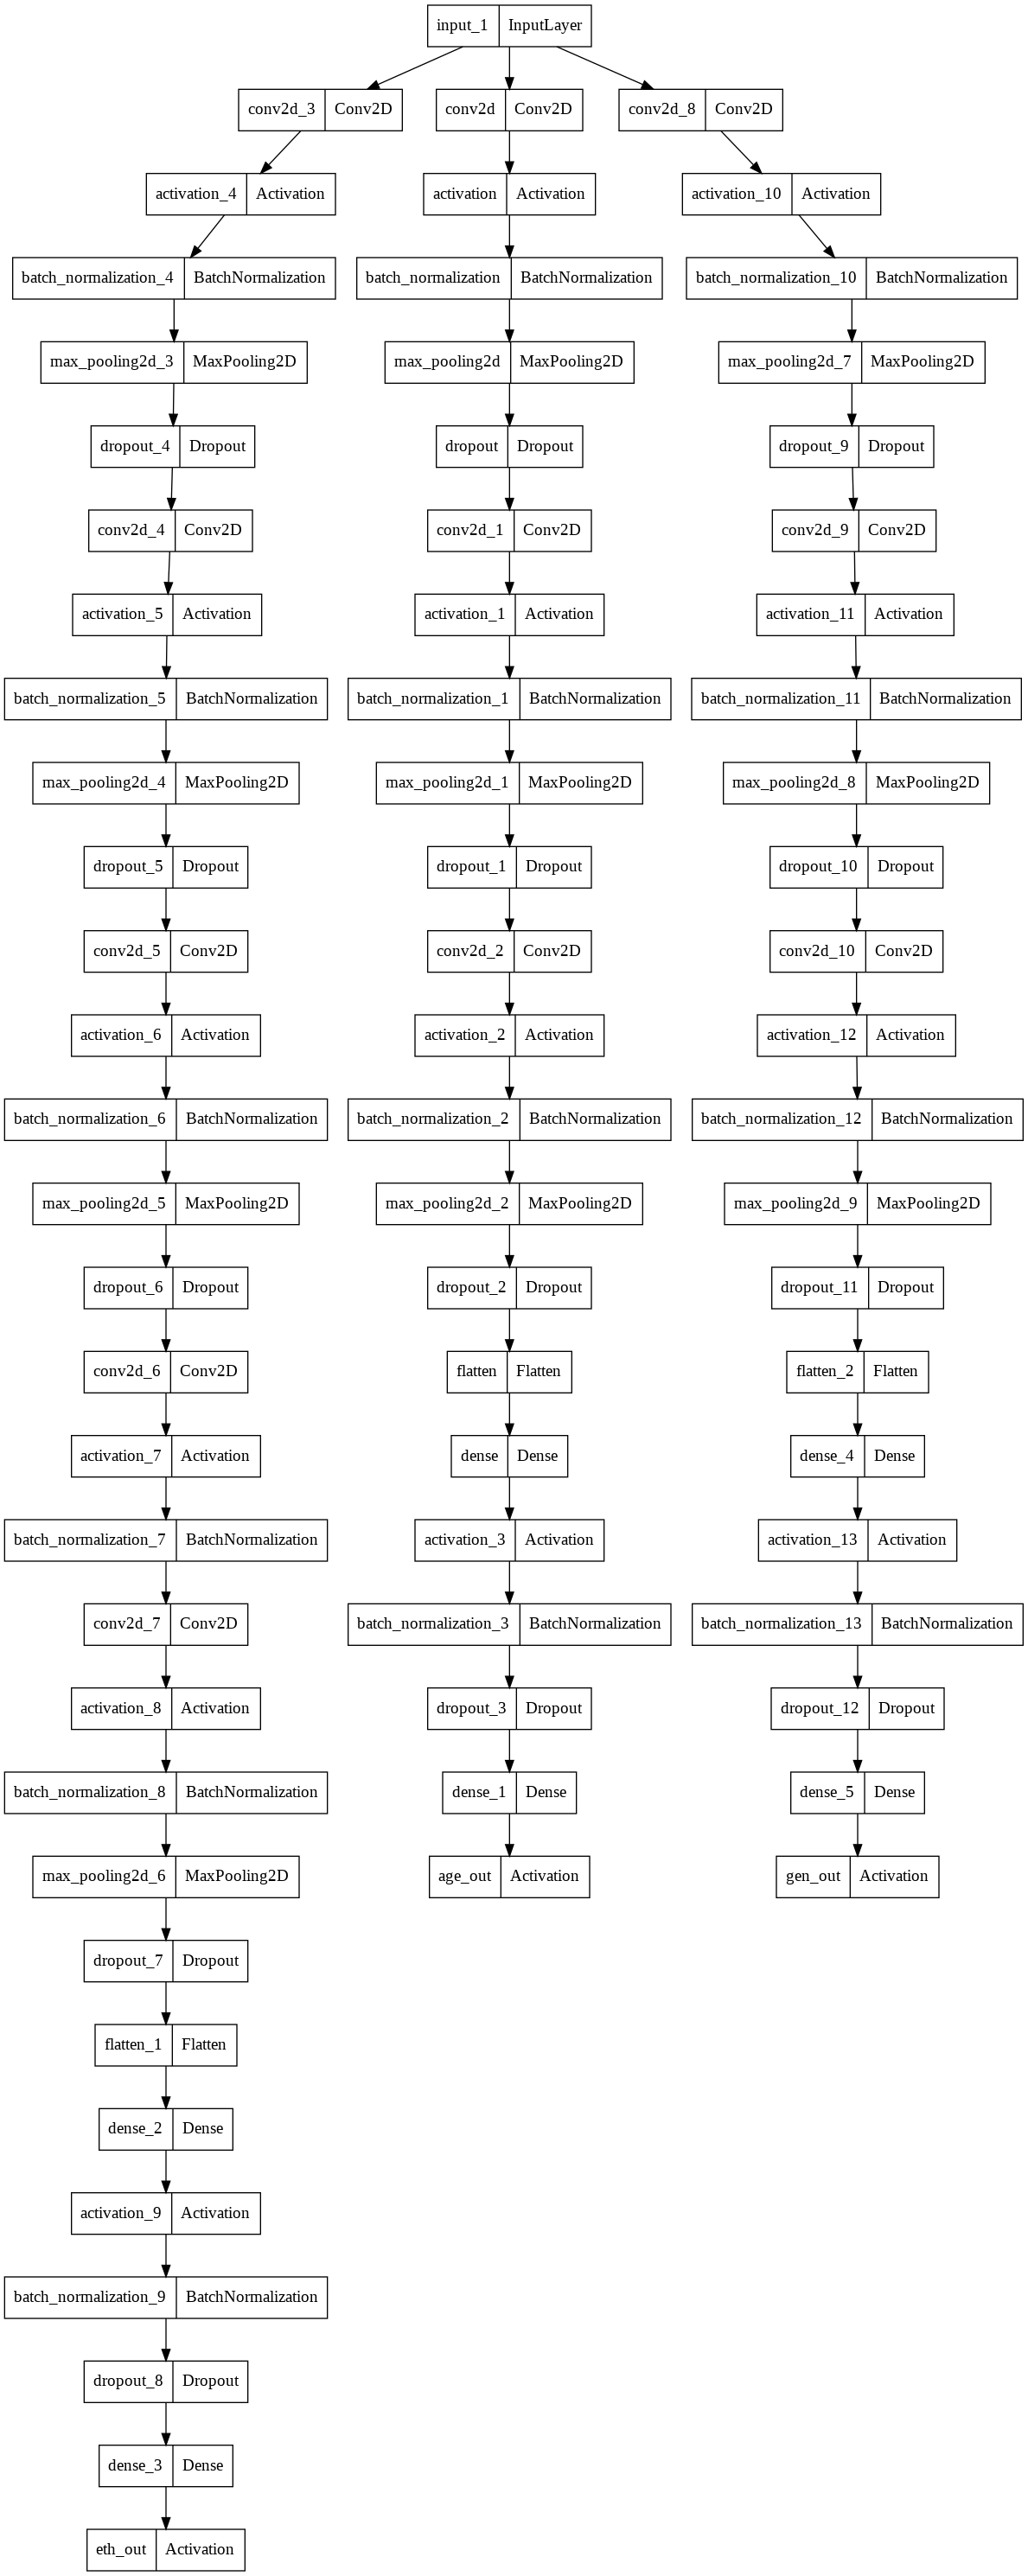

In [ ]:
plot_model(model)

In [ ]:
es_age = EarlyStopping(
    monitor="val_age_out_loss",
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

es_eth = EarlyStopping(
    monitor="val_eth_out_loss",
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

es_gen = EarlyStopping(
    monitor="val_gen_out_loss",
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

In [ ]:
history_model = model.fit(
    X_train,
    y={'age_out': y_train_age,'eth_out': y_train_eth, 'gen_out': y_train_gen},
    batch_size=200,
    validation_split = 0.1,
    validation_data=(X_val, {'age_out': y_val_age, 'eth_out': y_val_eth, 'gen_out': y_val_gen}),
    epochs=100,
    callbacks=[es_age, es_eth, es_gen],
    verbose=1)

Epoch 1/100
69/69 [==============================] - 18s 43ms/step - loss: 22.9855 - age_out_loss: 2.2605 - eth_out_loss: 1.9959 - gen_out_loss: 0.9096 - age_out_mean_absolute_error: 1.1500 - age_out_accuracy: 0.0289 - eth_out_mean_absolute_error: 0.2829 - eth_out_accuracy: 0.3371 - gen_out_mean_absolute_error: 0.4368 - gen_out_accuracy: 0.6272 - val_loss: 4.1356 - val_age_out_loss: 0.0493 - val_eth_out_loss: 1.5094 - val_gen_out_loss: 0.7223 - val_age_out_mean_absolute_error: 0.1658 - val_age_out_accuracy: 0.0487 - val_eth_out_mean_absolute_error: 0.2890 - val_eth_out_accuracy: 0.4368 - val_gen_out_mean_absolute_error: 0.5017 - val_gen_out_accuracy: 0.4710
Epoch 2/100
69/69 [==============================] - 2s 28ms/step - loss: 10.6177 - age_out_loss: 0.8536 - eth_out_loss: 1.5580 - gen_out_loss: 0.6730 - age_out_mean_absolute_error: 0.7146 - age_out_accuracy: 0.0317 - eth_out_mean_absolute_error: 0.2664 - eth_out_accuracy: 0.4214 - gen_out_mean_absolute_error: 0.4212 - gen_out_accur

Saving the model and weights

In [ ]:
# model.save("/content/drive/MyDrive/Image Classification/history_model.h5")

In [ ]:
# model=load_model('/content/drive/MyDrive/Image Classification/history_model.h5')
# model.summary()

Model: "cnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 48, 48, 16)   160         ['input_1[0][0]']                
                                                                                                  
 activation_4 (Activation)      (None, 48, 48, 16)   0           ['conv2d_3[0][0]']               
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 48, 48, 16)  64          ['activation_4[0][0]']           
 rmalization)                                                                                   

In [ ]:
# model.save_weights("/content/drive/MyDrive/Image Classification/multi-output_weights.h5")

Model evaluation

In [ ]:
score = model.evaluate(x=X_val, y={'age_out': y_val_age, 'eth_out': y_val_eth, 'gen_out': y_val_gen})

print(f'Validation loss for age: {round(score[1],3)}')
print(f'Validation loss for ethnicity: {round(score[2],3)}')
print(f'Validation loss for gender: {round(score[3],3)}')

print('Validation accuracy for age: {:.3f} %'.format(100 * score[5]))
print('Validation accuracy for ethnicity: {:.3f} %'.format(100 * score[7]))
print('Validation accuracy for gender: {:.3f} %'.format(100 * score[9]))

print(f'Validation mean absolute error for age: {round(score[4],3)}')
print(f'Validation mean absolute error for ethnicity: {round(score[6],3)}')
print(f'Validation mean absolute error for gender: {round(score[8],3)}')

119/119 [==============================] - 12s 8ms/step - loss: 1.8428 - age_out_loss: 0.0151 - eth_out_loss: 0.7244 - gen_out_loss: 0.2729 - age_out_mean_absolute_error: 0.0969 - age_out_accuracy: 0.0440 - eth_out_mean_absolute_error: 0.1368 - eth_out_accuracy: 0.7445 - gen_out_mean_absolute_error: 0.2446 - gen_out_accuracy: 0.8851
Validation loss for age: 0.015
Validation loss for ethnicity: 0.724
Validation loss for gender: 0.273
Validation accuracy for age: 4.403 %
Validation accuracy for ethnicity: 74.453 %
Validation accuracy for gender: 88.505 %
Validation mean absolute error for age: 0.097
Validation mean absolute error for ethnicity: 0.137
Validation mean absolute error for gender: 0.245


Model Predictions

In [ ]:
age_prob, eth_prob, gen_prob = model.predict(X_test)

In [ ]:
gen_pred = np.argmax(gen_prob, axis=1)
gen_pred

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
gen_true = np.argmax(y_test_gen, axis=1)
gen_true

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
conf_mat_gen = confusion_matrix(gen_true, gen_pred)

pd.DataFrame(conf_mat_gen)

,0,1
0,2109,340
1,234,2058


In [ ]:
gen_report = classification_report(gen_true, gen_pred, target_names=dataset_dict['gender_alias'].keys())
print(gen_report)

              precision    recall  f1-score   support

        male       0.90      0.86      0.88      2449
      female       0.86      0.90      0.88      2292

    accuracy                           0.88      4741
   macro avg       0.88      0.88      0.88      4741
weighted avg       0.88      0.88      0.88      4741



In [ ]:
eth_pred = np.argmax(eth_prob, axis=1)
eth_pred

array([2, 0, 1, ..., 3, 0, 3])

In [ ]:
eth_true = np.argmax(y_test_eth, axis=1)
eth_true

array([0, 0, 1, ..., 3, 4, 1])

Confusion matrix and evaluation metrics

In [ ]:
conf_mat_eth = confusion_matrix(eth_true, eth_pred)

conf_mat_eth = pd.DataFrame(conf_mat_eth, columns = ['white', 'black', 'asian', 'indian', 'hispanic'], index=['white', 'black', 'asian', 'indian', 'hispanic'])

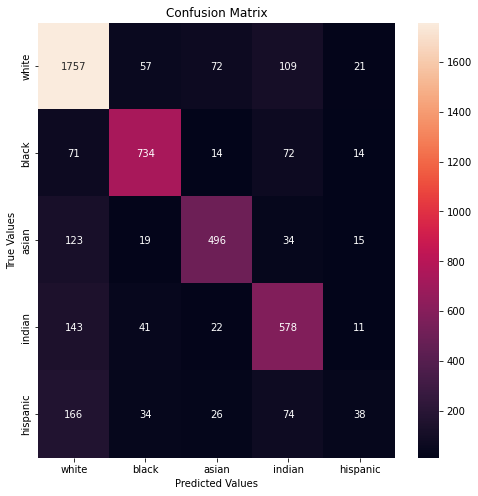

In [ ]:
import seaborn as sns

#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat_eth, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
eth_report = classification_report(eth_true, eth_pred, target_names=dataset_dict['ethnicity_alias'].keys())
print(eth_report)

              precision    recall  f1-score   support

       white       0.78      0.87      0.82      2016
       black       0.83      0.81      0.82       905
       asian       0.79      0.72      0.75       687
      indian       0.67      0.73      0.70       795
    hispanic       0.38      0.11      0.17       338

    accuracy                           0.76      4741
   macro avg       0.69      0.65      0.65      4741
weighted avg       0.74      0.76      0.74      4741



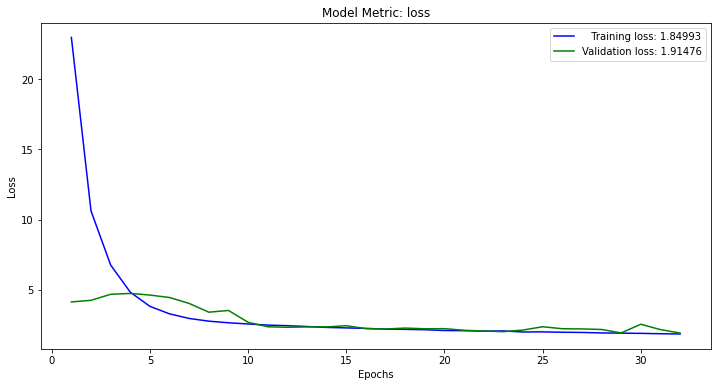

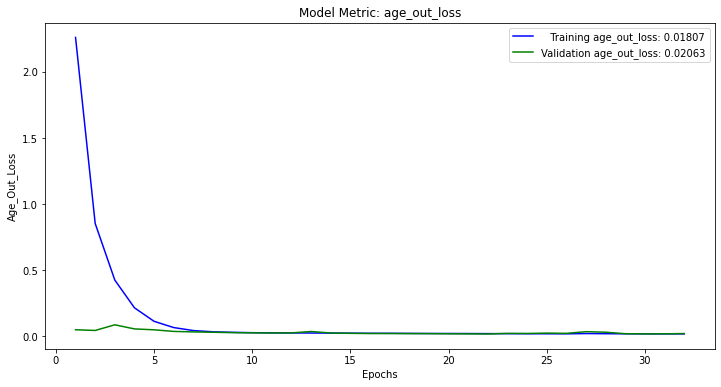

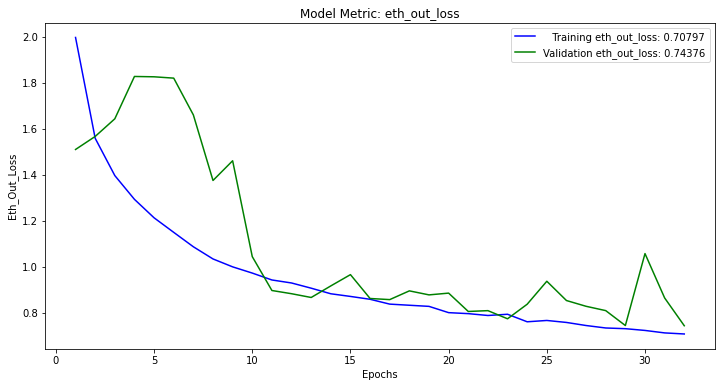

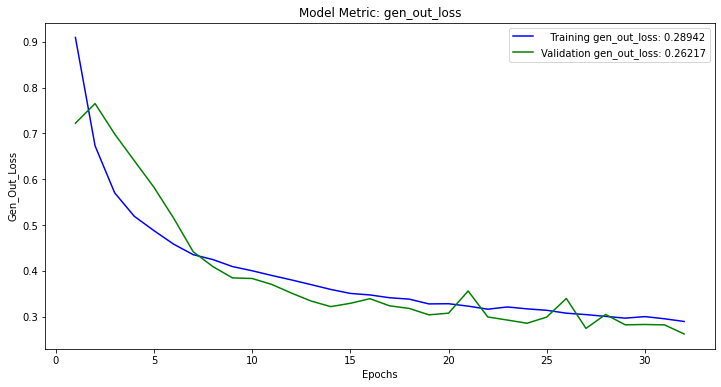

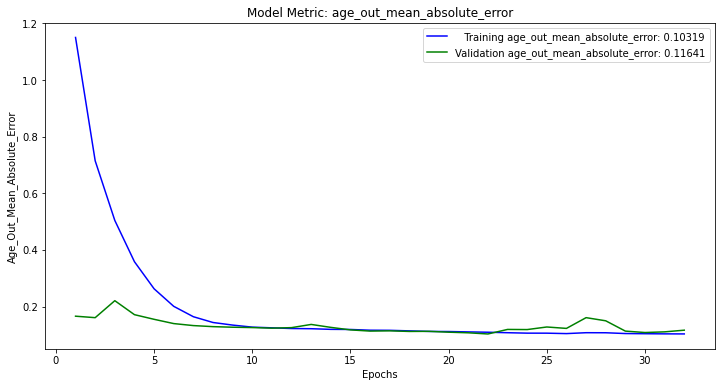

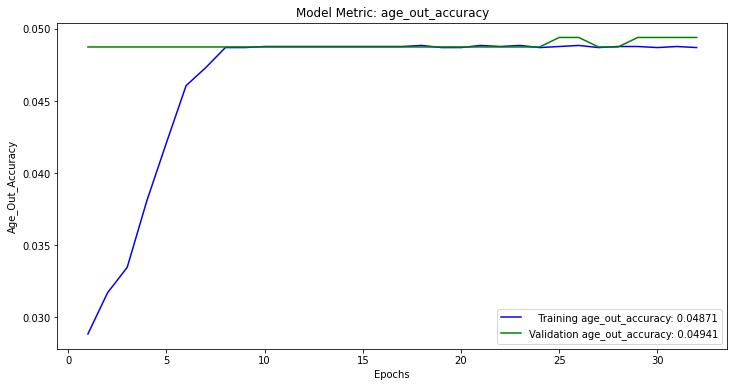

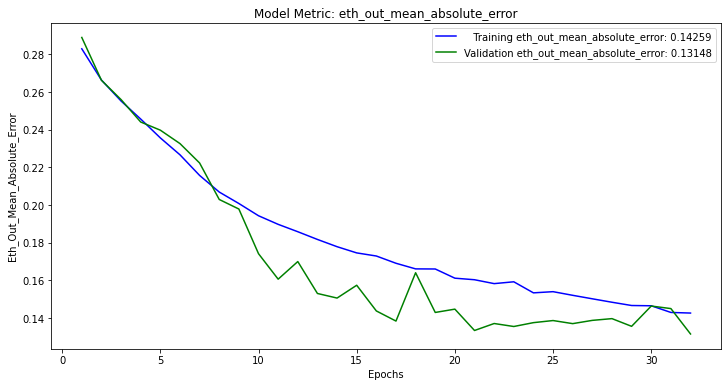

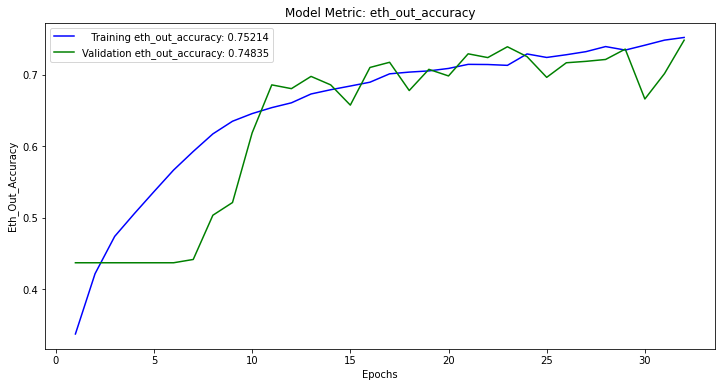

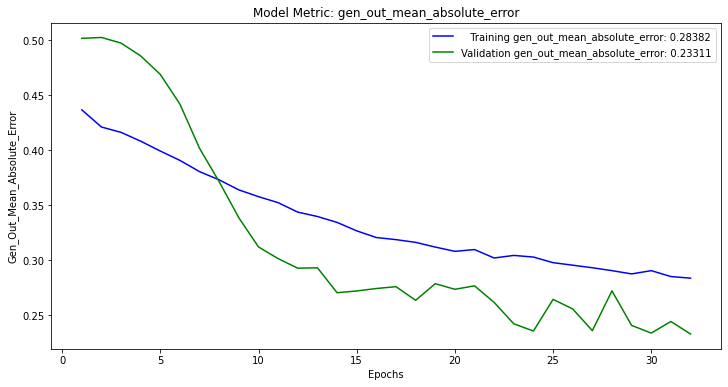

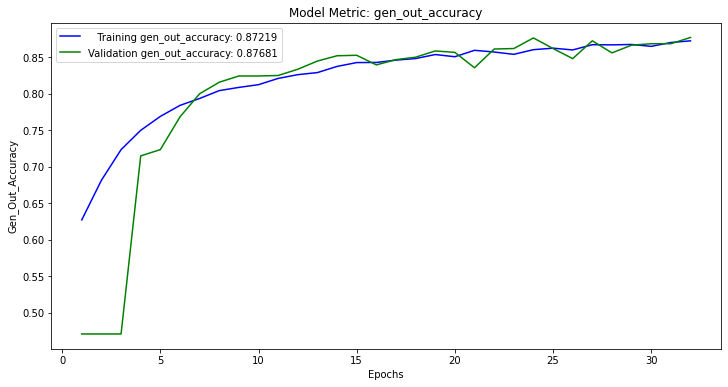

In [ ]:
plot_keras_history(history_model)

Comparison of actual and predicted values

In [ ]:
# 12 random samples
random_numbers = np.random.randint(low=0, high=len(X_test), size=12, dtype='int64')
random_examples = np.array([X_test[i] for i in random_numbers])
test = np.expand_dims(X_test[0], axis=0)
prediction = model.predict(random_examples)

In [ ]:
age_mapping = max(age_label)
ethnicity_mapping = np.array(["White", "Black", "Asian", "Indian", "Hispanic"])
gender_mapping = np.array(["Male", "Female"])

In [ ]:
# Predicted values
pred_ages = []
for pred in prediction[0]:
    pred_ages.append(pred*age_mapping)
pred_ages = [int(np.round(ages)) for ages in pred_ages]

pred_ethnicity = []
for pred in prediction[1]:
    eth_index = np.where(pred == np.amax(pred))
    pred_ethnicity.append(ethnicity_mapping[eth_index])
pred_genders = []
for pred in prediction[2]:
    gen_index = np.where(pred == np.amax(pred))
    pred_genders.append(gender_mapping[gen_index])

In [ ]:
real_ages = []
real_ethnicity = []
real_genders = []

for i in random_numbers:
    real_ages.append(int(np.round(y_test_age[i]*age_mapping)))
    real_ethnicity.append(ethnicity_mapping[np.where(y_test_eth[i] == 1)])
    real_genders.append(gender_mapping[np.where(y_test_gen.astype(int)[i] == 1)])

pictures = []
for i in random_numbers:
    image = X_test[i]*255
    pictures.append(image.astype(int))

In [ ]:
pred_ethnicity = np.squeeze(pred_ethnicity)
pred_genders = np.squeeze(pred_genders)
real_ages = np.squeeze(real_ages)

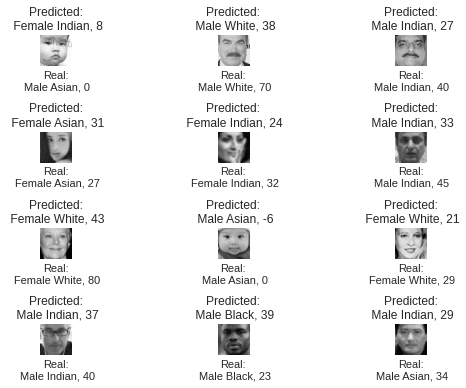

In [ ]:
cols = 3
rows = math.ceil(len(pictures) / cols)
plt.style.use('seaborn')
fig, axs = plt.subplots(nrows=rows, ncols=cols)
for i, ax in enumerate(axs.flat):
    if i == len(pictures):
        break
    image = np.stack((pictures[i],pictures[i], pictures[i]), axis=2)
    image = np.squeeze(image)
    ax.set(xticks=[], yticks=[])
    ax.set_title(f'Predicted:\n {pred_genders[i]} {pred_ethnicity[i]}, {pred_ages[i]}')
    ax.set_xlabel(f'Real:\n {real_genders[i][0]} {real_ethnicity[i][0]}, {real_ages[i]}')
    ax.imshow(image)

plt.tight_layout()
plt.show()

* **Single-output models (predicting one characteristic)**

*GENDER *

*Model 1 CNN - Best for gender*

In [ ]:
model_g = Sequential()

# adding a 2D Convolutional layer with 32 neurons with kernel size of 3X3, with relu activation.
model_g.add(Conv2D(32,
                 kernel_size=(3, 3), 
                 activation='relu',
                 input_shape=(48,48,1)))

# adding a 2D Convolutional layer with 64 neurons with kernel size of 3X3, with relu activation.
model_g.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

# Adding a Max Pooling layer to cut the size of the conv-layers 
model_g.add(MaxPooling2D(pool_size=(2, 2)))

# Adding dropout to regularize the model
model_g.add(Dropout(0.25))

# Flatten the MaxPooling Layer.
model_g.add(Flatten())

# Adding another Dense layer of 128 neurons with Relu activation.
model_g.add(Dense(128, activation='relu'))

# Adding dropout to regularize the model
model_g.add(Dropout(0.4))

# We have a MULTI-CLASS problem. This is the reason we use 2 neurons (as many as the genders)
# with the SOFTMAX activation. 
model_g.add(Dense(2,
                activation='softmax'))
model_g._name = "Model1"
print(model_g.summary())

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 30976)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               3965056   
                                                            

In [ ]:
model_g.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=['accuracy', 'binary_accuracy'])


In [ ]:
# Setting model hyperparameters
batch_size = 200
epochs = 180

# early stopping callback

es = EarlyStopping(
    monitor   = 'val_loss', # metric used as criterion to stop training
    min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 4, # epochs before stopping
    verbose   = 1, # verbosity level
    mode      = 'auto',
    restore_best_weights = True)

In [ ]:
class_weight_g = {c: w for c, w in enumerate(class_weight_g)} #different weights per class
class_weight_g

{0: 1.0, 1: 1.095152603231598}

In [ ]:
history_model_g = model_g.fit(
    X_train_g,
    y_train_enc_g,
    batch_size = batch_size,
    class_weight=class_weight_g,
    epochs = epochs,
    verbose = 1,
    validation_data= (X_val_g,y_val_enc_g),
    callbacks = [es])

Epoch 1/180
76/76 [==============================] - 3s 37ms/step - loss: 0.5481 - accuracy: 0.7397 - binary_accuracy: 0.7397 - val_loss: 0.3442 - val_accuracy: 0.8500 - val_binary_accuracy: 0.8500
Epoch 2/180
76/76 [==============================] - 3s 34ms/step - loss: 0.3518 - accuracy: 0.8531 - binary_accuracy: 0.8531 - val_loss: 0.3150 - val_accuracy: 0.8637 - val_binary_accuracy: 0.8637
Epoch 3/180
76/76 [==============================] - 3s 34ms/step - loss: 0.3028 - accuracy: 0.8731 - binary_accuracy: 0.8731 - val_loss: 0.2829 - val_accuracy: 0.8713 - val_binary_accuracy: 0.8713
Epoch 4/180
76/76 [==============================] - 2s 32ms/step - loss: 0.2775 - accuracy: 0.8859 - binary_accuracy: 0.8859 - val_loss: 0.2657 - val_accuracy: 0.8829 - val_binary_accuracy: 0.8829
Epoch 5/180
76/76 [==============================] - 3s 33ms/step - loss: 0.2575 - accuracy: 0.8946 - binary_accuracy: 0.8946 - val_loss: 0.2586 - val_accuracy: 0.8832 - val_binary_accuracy: 0.8832
Epoch 6/18

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
model_g.summary()

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 30976)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               3965056   
                                                            

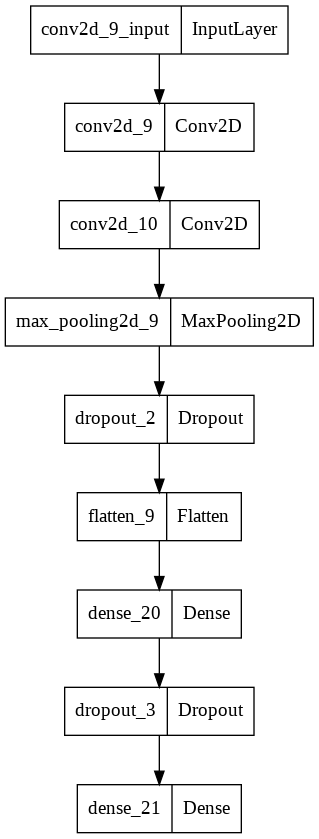

In [ ]:
plot_model(model_g)

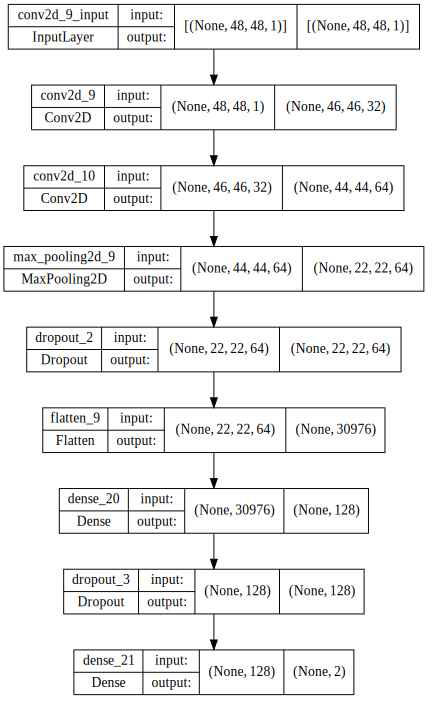

In [ ]:
SVG(model_to_dot(model_g, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

conv2d_9 (3, 3, 64, 64)
32


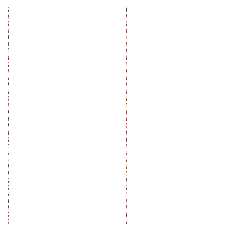

conv2d_10 (3, 3, 1, 32)
64


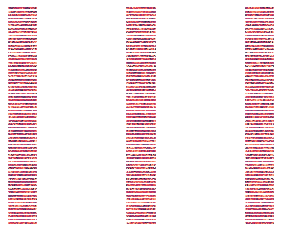

In [ ]:
# # #Iterate thru all the layers of the model
for layer in model_g.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

Saving the model and weights

In [ ]:
# saving the model to json format
open('model_g.json', 'w').write(model_g.to_json())
# saving the weights_g of the model separately
model_g.save_weights('weights_g.h5')

In [ ]:
for layer in model_g.layers:
    weights = layer.get_weights() 

In [ ]:
weights

[array([[ 0.07341859,  0.18472378],
        [-0.24339661,  0.21725586],
        [-0.09734053,  0.1711123 ],
        [ 0.15626334, -0.1837635 ],
        [ 0.00265307,  0.14449635],
        [-0.02733894,  0.12774372],
        [-0.17772661, -0.1060657 ],
        [ 0.19424094,  0.06234702],
        [-0.1446404 , -0.0451085 ],
        [ 0.2477021 ,  0.00128091],
        [ 0.01421729,  0.2832157 ],
        [-0.00264425, -0.00391086],
        [-0.12199859,  0.13166428],
        [ 0.12292947,  0.1930362 ],
        [-0.2239344 , -0.11179363],
        [-0.2714638 ,  0.04820799],
        [ 0.00812295, -0.18344092],
        [-0.1876602 , -0.00460011],
        [ 0.19142725,  0.0144499 ],
        [-0.10754157,  0.18988581],
        [ 0.11865829,  0.1870018 ],
        [ 0.02742948, -0.15592769],
        [ 0.19724278,  0.19116907],
        [-0.01782843,  0.04102775],
        [-0.04867176, -0.17005073],
        [ 0.14415693,  0.19020882],
        [ 0.2547677 , -0.00341774],
        [-0.15690692,  0.134

Model evaluation

In [ ]:
model_g.evaluate(X_val_g, y_val_enc_g, verbose=1)

119/119 [==============================] - 1s 5ms/step - loss: 0.2494 - accuracy: 0.8911 - binary_accuracy: 0.8911


[0.24944446980953217, 0.8911151885986328, 0.8911151885986328]

In [ ]:
score = model_g.evaluate(
    X_val_g,y_val_enc_g,             # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

19/19 - 0s - loss: 0.2494 - accuracy: 0.8911 - binary_accuracy: 0.8911 - 237ms/epoch - 12ms/step

Test categorical_crossentropy: 0.24944451451301575

Test accuracy: 89.112 %


Model Predictions

In [ ]:
model_g.evaluate(X_test_g, y_test_enc_g, verbose=1)

149/149 [==============================] - 1s 4ms/step - loss: 0.2564 - accuracy: 0.8947 - binary_accuracy: 0.8947


[0.25635629892349243, 0.8947479724884033, 0.8947479724884033]

In [ ]:
score = model_g.evaluate(
    X_test_g, y_test_enc_g,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

24/24 - 0s - loss: 0.2564 - accuracy: 0.8947 - binary_accuracy: 0.8947 - 285ms/epoch - 12ms/step

Test categorical_crossentropy: 0.25635629892349243

Test accuracy: 89.475 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_g = model_g.predict(X_test_g)
y_test_pred_probs_g

array([[6.3956535e-01, 3.6043471e-01],
       [9.9991989e-01, 8.0082122e-05],
       [4.1575897e-01, 5.8424103e-01],
       ...,
       [9.8426396e-01, 1.5736090e-02],
       [1.4591948e-04, 9.9985409e-01],
       [7.3570700e-06, 9.9999261e-01]], dtype=float32)

In [ ]:
y_test_pred_probs_g.shape

(4741, 2)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_g = np.argmax(model_g.predict(X_test_g), axis=-1)

y_test_preds_g[:50]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0])

In [ ]:
y_test_g[:50].to_numpy

<bound method IndexOpsMixin.to_numpy of 663      1
8765     0
16173    1
6195     1
10424    0
3627     1
21572    0
4082     0
22333    0
16107    1
9454     0
10092    0
3482     0
4748     1
18420    0
21637    1
16736    1
6434     1
12029    1
8562     0
8213     0
7661     0
4324     0
11882    1
14405    1
12275    0
12404    0
21123    0
14946    0
14213    0
4606     1
18559    1
20130    0
6902     1
592      0
12812    0
3480     0
17832    1
18649    0
19755    1
20178    0
23683    1
19807    0
7398     0
17809    1
11271    0
3660     0
17507    1
4388     1
14679    0
Name: gender, dtype: int64>

In [ ]:
# custom prediction function 
def get_one_hot_predictions(pred_probs):
    """
    """
    max_probs = np.max(pred_probs, axis=1)
    
    # reshaping to (len_of_predicts, 1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)

    return np.equal(pred_probs, max_probs).astype(float)

In [ ]:
y_test_pred_g = get_one_hot_predictions(y_test_pred_probs_g)
y_test_pred_g


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Confusion matrix and evaluation metrics

Text(0.5, 12.5, 'Predicted label')

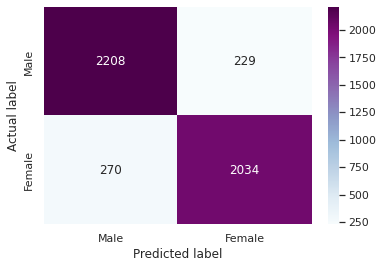

In [ ]:
sns.heatmap(confusion_matrix(y_test_preds_g,y_test_g),annot = True, fmt = 'd', cmap = "BuPu", xticklabels = ['Male','Female'] , yticklabels= ['Male','Female'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_true=y_test_g,
                            y_pred=y_test_preds_g))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2478
           1       0.88      0.90      0.89      2263

    accuracy                           0.89      4741
   macro avg       0.89      0.89      0.89      4741
weighted avg       0.89      0.89      0.89      4741



Visualizations

In [ ]:
def plot_keras_history(history):
    """
    
    :param history: 
    :return: 
    """
    # the history object gives the metrics keys. 
    # we will store the metrics keys that are from the training sesion.
    metrics_names = [key for key in history.history.keys() if not key.startswith('val_')]

    for i, metric in enumerate(metrics_names):
        
        # getting the training values
        metric_train_values = history.history.get(metric, [])
        
        # getting the validation values
        metric_val_values = history.history.get("val_{}".format(metric), [])

        # As loss always exists as a metric we use it to find the 
        epochs = range(1, len(metric_train_values) + 1)
        
        # leaving extra spaces to allign with the validation text
        training_text = "   Training {}: {:.5f}".format(metric,
                                                        metric_train_values[-1])

        # metric
        plt.figure(i, figsize=(12, 6))

        plt.plot(epochs,
                 metric_train_values,
                 'b',
                 label=training_text)
        
        # if we validation metric exists, then plot that as well
        if metric_val_values:
            validation_text = "Validation {}: {:.5f}".format(metric,
                                                             metric_val_values[-1])

            plt.plot(epochs,
                     metric_val_values,
                     'g',
                     label=validation_text)
        
        # add title, xlabel, ylabe, and legend
        plt.title('Model Metric: {}'.format(metric))
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()

    plt.show()

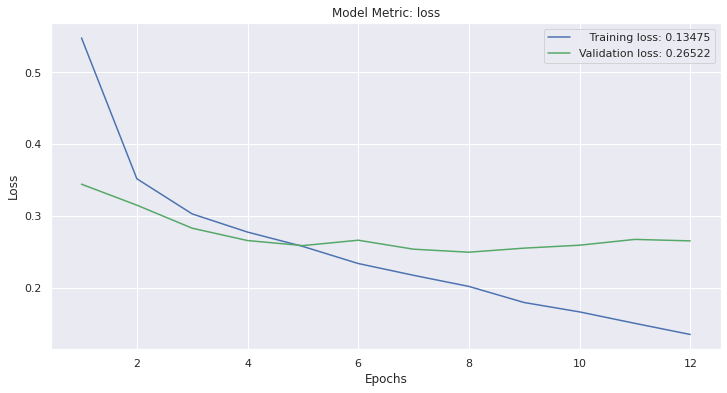

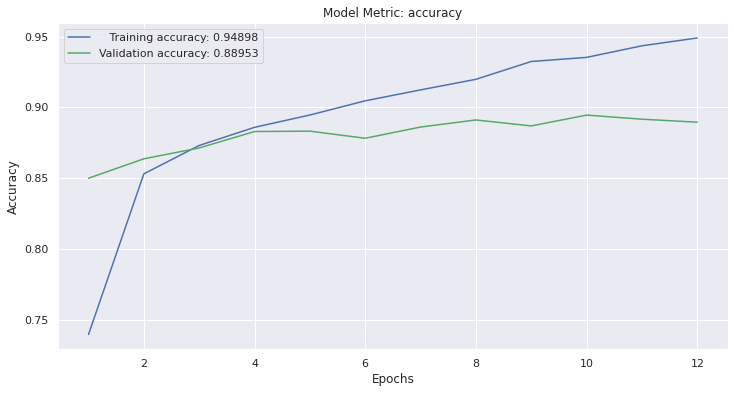

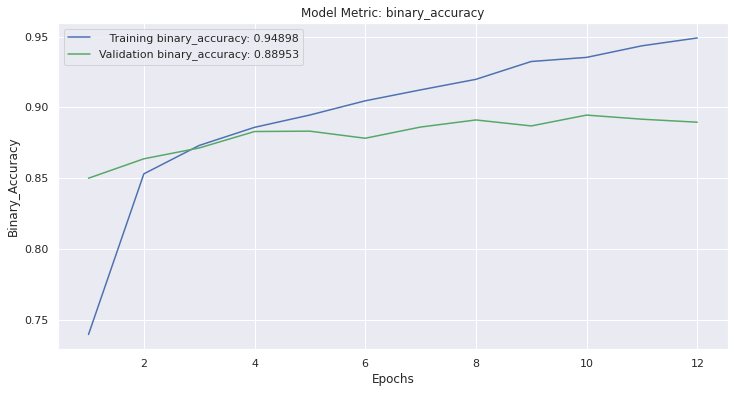

In [ ]:
plot_keras_history(history_model_g)

*Model 2 CNN - Using hyperparameter tunning - (without using one hot encoding for gender)*

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(48, 48)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(2, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy','binary_accuracy'])
  model._name = "Model2"
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=2,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train_g, y_train_g, epochs=50, validation_data= (X_val_g,y_val_g), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 288 and the optimal learning rate for the optimizer
is 0.01.



In [ ]:
# Train the model

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_gh = tuner.hypermodel.build(best_hps)
history = model_gh.fit(X_train_g, y_train_g, epochs=50, validation_data= (X_val_g,y_val_g), class_weight=class_weight_g) #class_wights created using one hot data

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
475/475 [==============================] - 3s 4ms/step - loss: 1.0098 - accuracy: 0.6956 - binary_accuracy: 0.5190 - val_loss: 0.6387 - val_accuracy: 0.6320 - val_binary_accuracy: 0.4753
Epoch 2/50
475/475 [==============================] - 2s 4ms/step - loss: 0.5429 - accuracy: 0.7499 - binary_accuracy: 0.5425 - val_loss: 0.7764 - val_accuracy: 0.6327 - val_binary_accuracy: 0.6106
Epoch 3/50
475/475 [==============================] - 2s 3ms/step - loss: 0.4759 - accuracy: 0.7917 - binary_accuracy: 0.5542 - val_loss: 0.4130 - val_accuracy: 0.8265 - val_binary_accuracy: 0.5475
Epoch 4/50
475/475 [==============================] - 2s 4ms/step - loss: 0.4394 - accuracy: 0.8144 - binary_accuracy: 0.5410 - val_loss: 0.3960 - val_accuracy: 0.8379 - val_binary_accuracy: 0.4690
Epoch 5/50
475/475 [==============================] - 2s 3ms/step - loss: 0.4408 - accuracy: 0.8162 - binary_accuracy: 0.4890 - val_loss: 0.4499 - val_accuracy: 0.7973 - val_binary_accuracy: 0.5968
Epoch 6/50

In [ ]:
# Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
history_model_gh= hypermodel.fit(X_train_g, y_train_g, epochs=best_epoch, validation_data= (X_val_g,y_val_g))

Epoch 1/17
475/475 [==============================] - 2s 4ms/step - loss: 0.8113 - accuracy: 0.7251 - binary_accuracy: 0.5121 - val_loss: 0.4237 - val_accuracy: 0.8012 - val_binary_accuracy: 0.4553
Epoch 2/17
475/475 [==============================] - 2s 3ms/step - loss: 0.4524 - accuracy: 0.7916 - binary_accuracy: 0.4956 - val_loss: 0.3943 - val_accuracy: 0.8202 - val_binary_accuracy: 0.4925
Epoch 3/17
475/475 [==============================] - 2s 3ms/step - loss: 0.4540 - accuracy: 0.7893 - binary_accuracy: 0.4803 - val_loss: 0.4103 - val_accuracy: 0.8260 - val_binary_accuracy: 0.5100
Epoch 4/17
475/475 [==============================] - 2s 3ms/step - loss: 0.4342 - accuracy: 0.8035 - binary_accuracy: 0.4736 - val_loss: 0.3728 - val_accuracy: 0.8408 - val_binary_accuracy: 0.4844
Epoch 5/17
475/475 [==============================] - 2s 3ms/step - loss: 0.4065 - accuracy: 0.8141 - binary_accuracy: 0.4874 - val_loss: 0.9753 - val_accuracy: 0.6480 - val_binary_accuracy: 0.6084
Epoch 6/17

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
hypermodel.summary()

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_18 (Dense)            (None, 288)               663840    
                                                                 
 dense_19 (Dense)            (None, 2)                 578       
                                                                 
Total params: 664,418
Trainable params: 664,418
Non-trainable params: 0
_________________________________________________________________


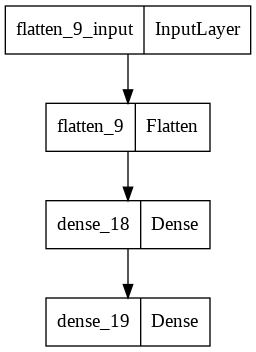

In [ ]:
plot_model(hypermodel)

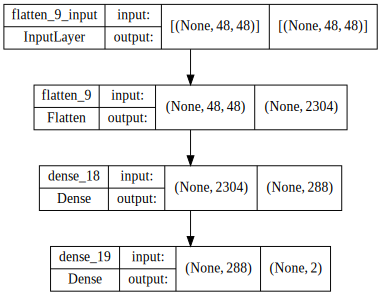

In [ ]:
SVG(model_to_dot(hypermodel, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

Saving the model and weights

In [ ]:
# saving the model to json format
open('hypermodel.json', 'w').write(hypermodel.to_json())
# saving the weights_g of the model separately
model_gh.save_weights('weights_hyper_g.h5')

Evaluating the hypermodel on validation data

In [ ]:
eval_result = hypermodel.evaluate(X_val_g, y_val_g) #verbose=1
print("[val loss, val accuracy]:", eval_result)

119/119 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8318 - binary_accuracy: 0.4951
[val loss, val accuracy]: [0.3491223454475403, 0.8317953944206238, 0.4951225817203522]


In [ ]:
score = hypermodel.evaluate(
    X_val_g, y_val_g,              # labels
    batch_size=200,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

19/19 - 0s - loss: 0.3491 - accuracy: 0.8318 - binary_accuracy: 0.4951 - 66ms/epoch - 3ms/step

Test categorical_crossentropy: 0.34912240505218506

Test accuracy: 83.180 %


Model Predictions

In [ ]:
eval_result = hypermodel.evaluate(X_test_g, y_test_g) #verbose=1
print("[test loss, test accuracy]:", eval_result)

149/149 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8308 - binary_accuracy: 0.4895
[test loss, test accuracy]: [0.35020872950553894, 0.8308373689651489, 0.4894537031650543]


In [ ]:
score = hypermodel.evaluate(
    X_test_g, y_test_g,              # labels
    batch_size=200,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

24/24 - 0s - loss: 0.3502 - accuracy: 0.8308 - binary_accuracy: 0.4895 - 130ms/epoch - 5ms/step

Test categorical_crossentropy: 0.3502088487148285

Test accuracy: 83.084 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_gh =hypermodel.predict(X_test_g)
y_test_pred_probs_gh

array([[0.5412899 , 0.45871007],
       [0.9900359 , 0.1856319 ],
       [0.61984265, 0.44724682],
       ...,
       [0.84384155, 0.35064194],
       [0.14633077, 0.61389756],
       [0.01988878, 0.7612838 ]], dtype=float32)

In [ ]:
y_test_pred_probs_gh.shape

(4741, 2)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_gh = np.argmax(model_gh.predict(X_test_g), axis=-1)

y_test_preds_gh[:50]

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0])

In [ ]:
y_test_pred_gh = get_one_hot_predictions(y_test_pred_probs_gh)
y_test_pred_gh


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Confusion matrix and evaluation Metrics

Text(0.5, 12.5, 'Predicted label')

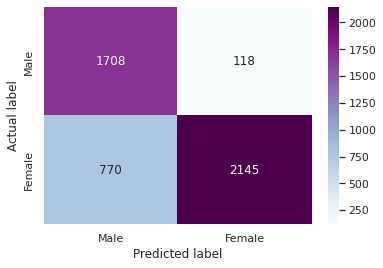

In [ ]:
sns.heatmap(confusion_matrix(y_test_preds_gh,y_test_g),annot = True, fmt = 'd', cmap = "BuPu", xticklabels = ['Male','Female'] , yticklabels= ['Male','Female'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_true=y_test_g,
                            y_pred=y_test_preds_gh))

              precision    recall  f1-score   support

           0       0.94      0.69      0.79      2478
           1       0.74      0.95      0.83      2263

    accuracy                           0.81      4741
   macro avg       0.84      0.82      0.81      4741
weighted avg       0.84      0.81      0.81      4741



Visualizations

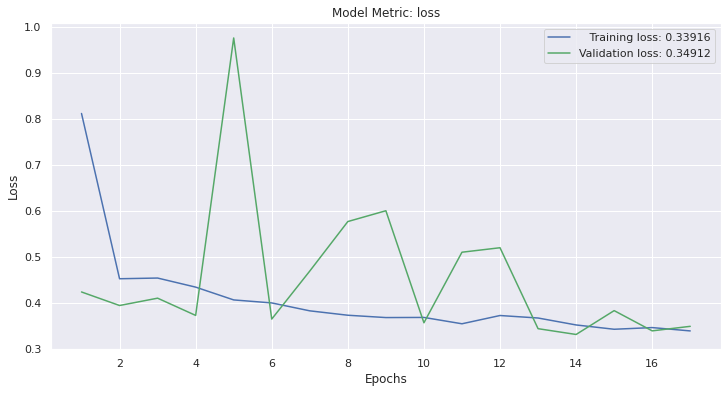

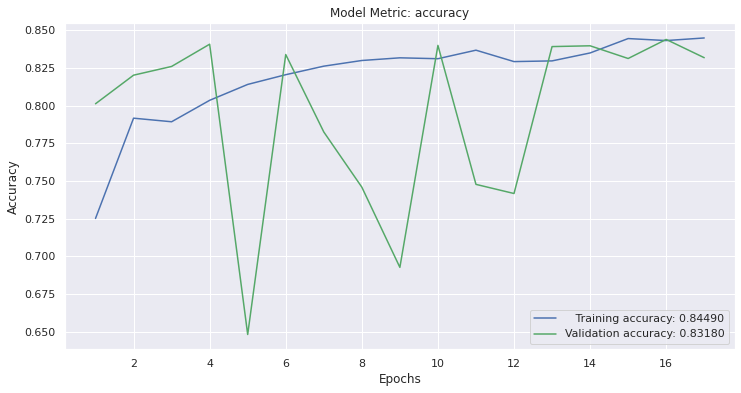

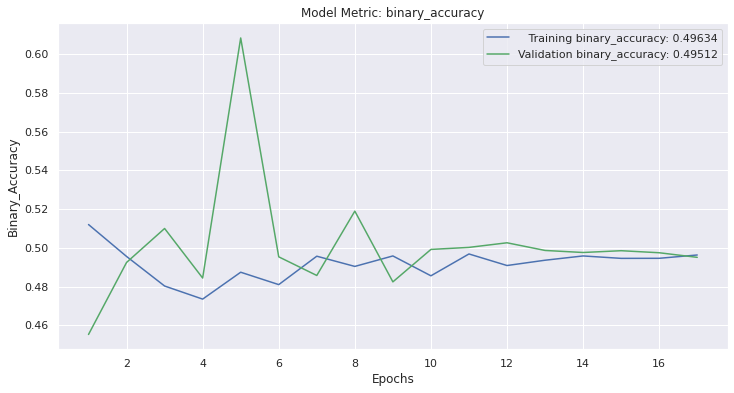

In [ ]:
plot_keras_history(history_model_gh)

*Model 3 - RNN GRU (without one hot encoding)*

In [ ]:
# Train and Fit the GRU RNN Model for gender

In [ ]:
model_ggru = keras.Sequential()
model_ggru.add(layers.GRU(64, input_shape=(48, 48)))
model_ggru.add(layers.BatchNormalization())
model_ggru.add(layers.Dense(2))
model_ggru._name = "Model3"
print(model_ggru.summary())


Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                21888     
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_28 (Dense)            (None, 2)                 130       
                                                                 
Total params: 22,274
Trainable params: 22,146
Non-trainable params: 128
_________________________________________________________________
None


In [ ]:
model_ggru.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy", "binary_accuracy"],
)	

In [ ]:
es = EarlyStopping(
    monitor   = 'val_loss', # which metric we want to use as criterion to stop training
    min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 3, # 3 epochs before stopping
    verbose   = 1, # verbosity level
    mode      = 'auto',
    restore_best_weights = True)

In [ ]:
history_model_ggru= model_ggru.fit(
    X_train_g, y_train_g, validation_data=(X_val_g, y_val_g), batch_size=64, epochs=10, callbacks = [es]
)

Epoch 1/10
238/238 [==============================] - 4s 9ms/step - loss: 0.6292 - accuracy: 0.6453 - binary_accuracy: 0.5392 - val_loss: 0.6148 - val_accuracy: 0.6749 - val_binary_accuracy: 0.5413
Epoch 2/10
238/238 [==============================] - 2s 7ms/step - loss: 0.5753 - accuracy: 0.6998 - binary_accuracy: 0.5338 - val_loss: 0.5841 - val_accuracy: 0.6807 - val_binary_accuracy: 0.5170
Epoch 3/10
238/238 [==============================] - 2s 10ms/step - loss: 0.5214 - accuracy: 0.7413 - binary_accuracy: 0.5317 - val_loss: 0.5107 - val_accuracy: 0.7482 - val_binary_accuracy: 0.5480
Epoch 4/10
238/238 [==============================] - 2s 7ms/step - loss: 0.4934 - accuracy: 0.7605 - binary_accuracy: 0.5215 - val_loss: 0.5784 - val_accuracy: 0.6960 - val_binary_accuracy: 0.5637
Epoch 5/10
238/238 [==============================] - 2s 7ms/step - loss: 0.4687 - accuracy: 0.7781 - binary_accuracy: 0.5015 - val_loss: 0.5779 - val_accuracy: 0.6886 - val_binary_accuracy: 0.5654
Epoch 6/1

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
model_ggru.summary()

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                21888     
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_28 (Dense)            (None, 2)                 130       
                                                                 
Total params: 22,274
Trainable params: 22,146
Non-trainable params: 128
_________________________________________________________________


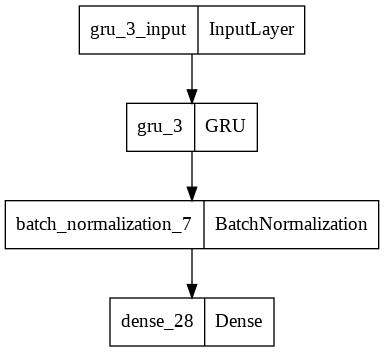

In [ ]:
plot_model(model_ggru)

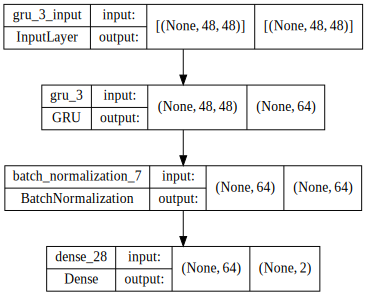

In [ ]:
SVG(model_to_dot(model_ggru, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

Saving the model and weights

In [ ]:
# saving the model to json format
open('model_ggru.json', 'w').write(model_ggru.to_json())
# saving the weights_g of the model separately
model_g.save_weights('weights_ggru.h5')

Model Evaluation

In [ ]:
model_ggru.evaluate(X_val_g, y_val_g, verbose=1)

119/119 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7482 - binary_accuracy: 0.5480


[0.5106934309005737, 0.7482203841209412, 0.5479831099510193]

In [ ]:
score = model_ggru.evaluate(
    X_val_g,    # features
    y_val_g,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

19/19 - 0s - loss: 0.5107 - accuracy: 0.7482 - binary_accuracy: 0.5480 - 91ms/epoch - 5ms/step

Test categorical_crossentropy: 0.510693371295929

Test accuracy: 74.822 %


Model Predictions

In [ ]:
model_ggru.evaluate(X_test_g, y_test_g, verbose=1)

149/149 [==============================] - 1s 4ms/step - loss: 0.5265 - accuracy: 0.7433 - binary_accuracy: 0.5271


[0.5265165567398071, 0.743303120136261, 0.5271039605140686]

In [ ]:
score = model_ggru.evaluate(
    X_test_g,    # features
    y_test_g,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

24/24 - 0s - loss: 0.5265 - accuracy: 0.7433 - binary_accuracy: 0.5271 - 108ms/epoch - 4ms/step

Test categorical_crossentropy: 0.5265161991119385

Test accuracy: 74.330 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_ggru =model_ggru.predict(X_test_g)
y_test_pred_probs_ggru

array([[-0.1910676,  0.501796 ],
       [ 0.5780331, -1.2532227],
       [ 2.0669956,  1.4814466],
       ...,
       [ 0.2732425, -0.9238043],
       [ 0.5945863,  1.2036864],
       [-0.5406288,  4.3280144]], dtype=float32)

In [ ]:
y_test_pred_probs_ggru.shape

(4741, 2)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_ggru = np.argmax(model_ggru.predict(X_test_g), axis=-1)

y_test_preds_ggru[:50]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0])

In [ ]:
y_test_pred_ggru = get_one_hot_predictions(y_test_pred_probs_ggru)
y_test_pred_ggru


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Confusion matrix and evaluation metrics

Text(0.5, 12.5, 'Predicted label')

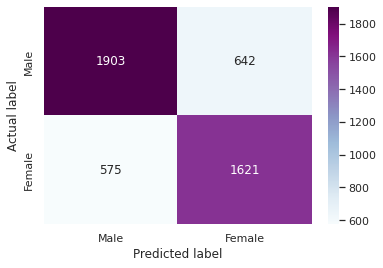

In [ ]:
sns.heatmap(confusion_matrix(y_test_preds_ggru,y_test_g),annot = True, fmt = 'd', cmap = "BuPu", xticklabels = ['Male','Female'] , yticklabels= ['Male','Female'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_true=y_test_g,
                            y_pred=y_test_preds_ggru))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2478
           1       0.74      0.72      0.73      2263

    accuracy                           0.74      4741
   macro avg       0.74      0.74      0.74      4741
weighted avg       0.74      0.74      0.74      4741



Visualizations

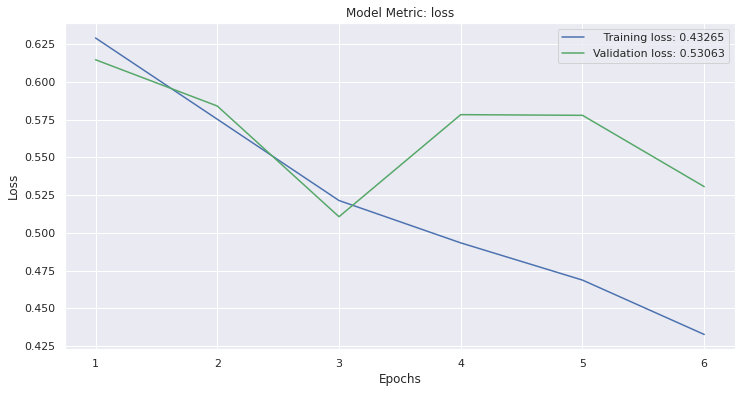

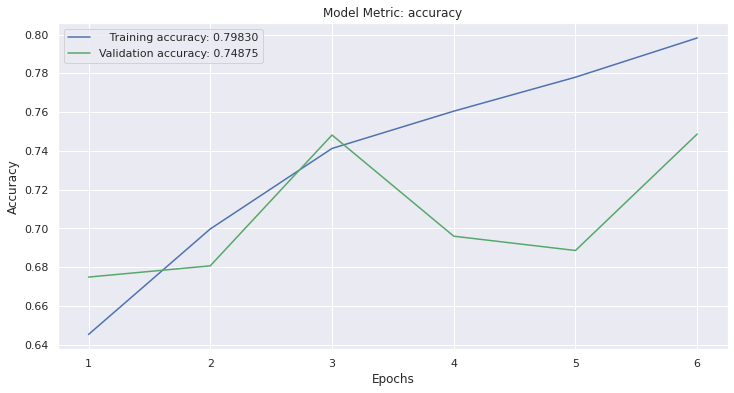

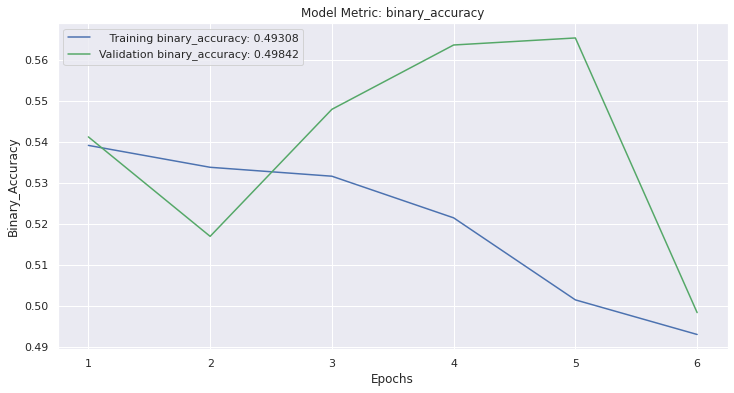

In [ ]:
plot_keras_history(history_model_ggru)

*ETHNICITY *

*Model 4 CNN*

In [ ]:
model_e = Sequential() 
model_e.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
model_e.add(BatchNormalization())
model_e.add(MaxPool2D(pool_size=(2, 2)))
model_e.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
model_e.add(BatchNormalization())
model_e.add(MaxPool2D(pool_size=(2, 2)))
model_e.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
model_e.add(MaxPool2D(pool_size=(2, 2)))
model_e.add(Flatten())
model_e.add(Dense(256, activation='relu'))
model_e.add(Dropout(0.5))
model_e.add(Dense(5, activation= 'softmax'))
# model_e.compile(optimizer='Adam',
#               loss= 'categorical_crossentropy',
#               metrics=['accuracy'])
model_e._name = "Model4"

In [ ]:
model_e.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=['accuracy'])


In [ ]:
# Setting model hyperparameters
batch_size = 200
epochs = 180

# early stopping callback

es = EarlyStopping(
    monitor   = 'val_loss', # metric used as criterion to stop training
    min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 4, # epochs before stopping
    verbose   = 1, # verbosity level
    mode      = 'auto',
    restore_best_weights = True)

In [ ]:
class_weight_e = {c: w for c, w in enumerate(class_weight_e)} #different weights per class
class_weight_e

{0: 1.0,
 1: 2.2260959613393165,
 2: 2.934030937215651,
 3: 2.53498427672956,
 4: 5.954755309325947}

In [ ]:
history_model_e = model_e.fit(
    X_train_e,
    y_train_enc_e,
    batch_size = batch_size,
    class_weight=class_weight_e,
    epochs = epochs,
    verbose = 1,
     validation_data= (X_val_e,y_val_enc_e),
    callbacks = [es])

Epoch 1/180
76/76 [==============================] - 17s 31ms/step - loss: 3.6661 - accuracy: 0.3731 - val_loss: 1.5464 - val_accuracy: 0.4210
Epoch 2/180
76/76 [==============================] - 2s 23ms/step - loss: 2.6054 - accuracy: 0.5271 - val_loss: 1.3484 - val_accuracy: 0.4461
Epoch 3/180
76/76 [==============================] - 2s 23ms/step - loss: 2.2554 - accuracy: 0.6006 - val_loss: 1.3791 - val_accuracy: 0.4603
Epoch 4/180
76/76 [==============================] - 2s 23ms/step - loss: 2.0701 - accuracy: 0.6482 - val_loss: 1.2235 - val_accuracy: 0.5376
Epoch 5/180
76/76 [==============================] - 2s 23ms/step - loss: 1.9316 - accuracy: 0.6673 - val_loss: 1.0616 - val_accuracy: 0.6507
Epoch 6/180
76/76 [==============================] - 2s 23ms/step - loss: 1.8025 - accuracy: 0.6851 - val_loss: 0.9272 - val_accuracy: 0.6926
Epoch 7/180
76/76 [==============================] - 2s 23ms/step - loss: 1.7064 - accuracy: 0.7022 - val_loss: 0.7692 - val_accuracy: 0.7253
Epoch

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
model_e.summary()

Model: "Model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                            

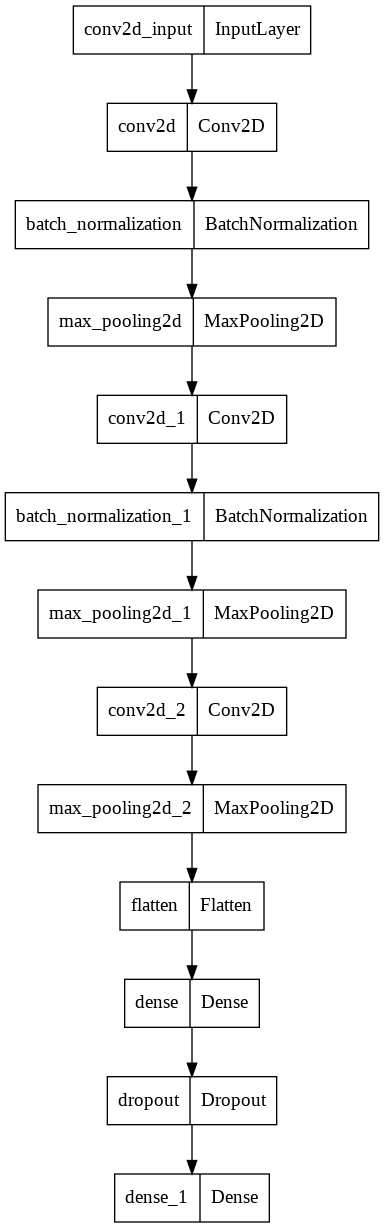

In [ ]:
plot_model(model_e)

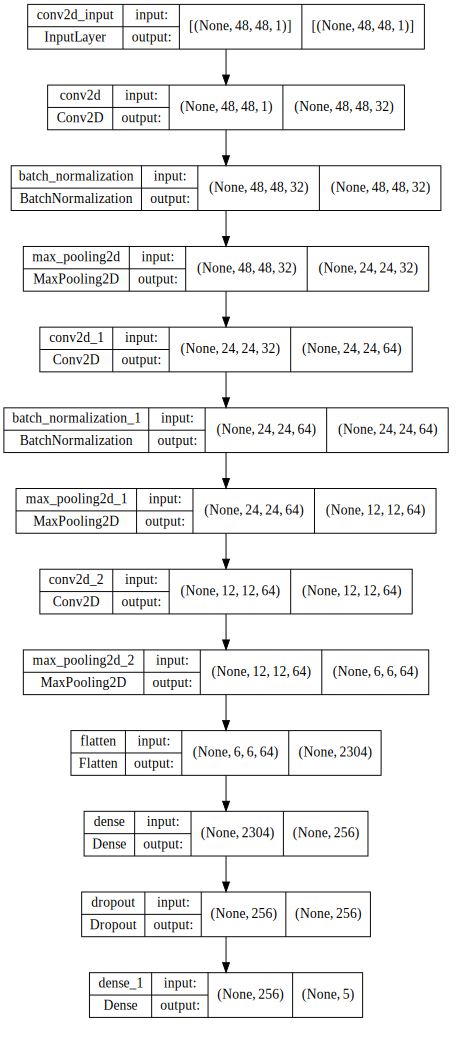

In [ ]:
SVG(model_to_dot(model_e, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

conv2d (3, 3, 64, 64)
32


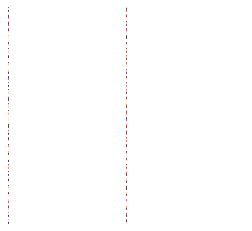

conv2d_1 (3, 3, 1, 32)
64


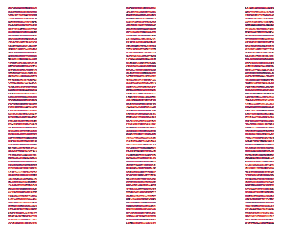

conv2d_2 (3, 3, 32, 64)
64


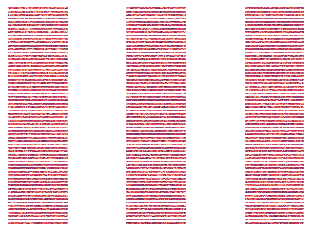

In [ ]:
# #Iterate thru all the layers of the model
for layer in model_e.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

Saving the model and weights

In [ ]:
# saving the model to json format
open('model_e.json', 'w').write(model_e.to_json())
# saving the weights_g of the model separately
model_e.save_weights('weights_e.h5')

Model Evaluation

In [ ]:
model_e.evaluate(X_val_e, y_val_enc_e, verbose=1)

119/119 [==============================] - 1s 4ms/step - loss: 0.7036 - accuracy: 0.7588


[0.7035977840423584, 0.7587661743164062]

In [ ]:
score = model_e.evaluate(
    X_val_e,    # features
    y_val_enc_e,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)

19/19 - 0s - loss: 0.7036 - accuracy: 0.7588 - 183ms/epoch - 10ms/step


In [ ]:
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))


Test categorical_crossentropy: 0.7035977840423584

Test accuracy: 75.877 %


Model Predictions

In [ ]:
model_e.evaluate(X_test_e, y_test_enc_e, verbose=1)

149/149 [==============================] - 1s 4ms/step - loss: 0.7286 - accuracy: 0.7557


[0.728604793548584, 0.7557477355003357]

In [ ]:
score = model_e.evaluate(
    X_test_e,    # features
    y_test_enc_e,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

24/24 - 0s - loss: 0.7286 - accuracy: 0.7557 - 312ms/epoch - 13ms/step

Test categorical_crossentropy: 0.7286047339439392

Test accuracy: 75.575 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_e = model_e.predict(X_test_e)
y_test_pred_probs_e

array([[2.1942635e-01, 2.1517335e-02, 2.3186864e-02, 3.7245899e-01,
        3.6341041e-01],
       [9.8112750e-01, 2.9663561e-04, 6.1208957e-05, 5.0750544e-04,
        1.8007165e-02],
       [3.1516826e-01, 3.4298780e-04, 1.9405860e-01, 3.6120255e-02,
        4.5430985e-01],
       ...,
       [9.9624026e-01, 7.8204292e-05, 2.8244886e-04, 4.2266498e-04,
        2.9763563e-03],
       [7.5726837e-07, 2.3435394e-11, 9.9999869e-01, 9.6234319e-11,
        5.8426718e-07],
       [4.3293300e-01, 3.3078212e-02, 5.0963765e-01, 1.7217570e-03,
        2.2629358e-02]], dtype=float32)

In [ ]:
y_test_pred_probs_e.shape

(4741, 5)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_e = np.argmax(model_e.predict(X_test_e), axis=-1)

y_test_preds_e[:50]

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_e = np.argmax(model_e.predict(X_test_e), axis=-1)

y_test_preds_e[:50]

array([3, 0, 4, 1, 1, 3, 1, 1, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 1, 2, 3, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 2, 2, 0, 2, 4, 3, 3, 0, 1, 3, 0, 3,
       3, 1, 0, 0, 1, 0])

In [ ]:
y_test_pred_e = get_one_hot_predictions(y_test_pred_probs_e)
y_test_pred_e


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

Confusion matrix and evaluation metrics

Text(0.5, 12.5, 'Predicted label')

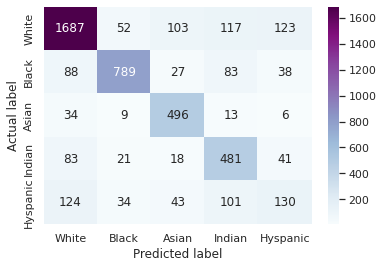

In [ ]:
sns.heatmap(confusion_matrix(y_test_preds_e,y_test_e),annot = True, fmt = 'd', cmap = "BuPu",xticklabels = ["White","Black","Asian","Indian","Hyspanic"],yticklabels = ["White","Black","Asian","Indian","Hyspanic"])
#["White","Black","Asian","Indian","Hispanic"]
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [ ]:
print(classification_report(y_true=y_test_e,
                            y_pred=y_test_preds_e))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2016
           1       0.77      0.87      0.82       905
           2       0.89      0.72      0.80       687
           3       0.75      0.61      0.67       795
           4       0.30      0.38      0.34       338

    accuracy                           0.76      4741
   macro avg       0.70      0.68      0.69      4741
weighted avg       0.77      0.76      0.76      4741



Visualizations

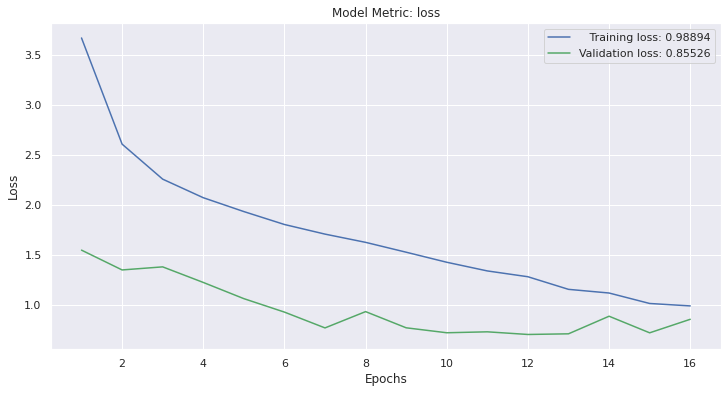

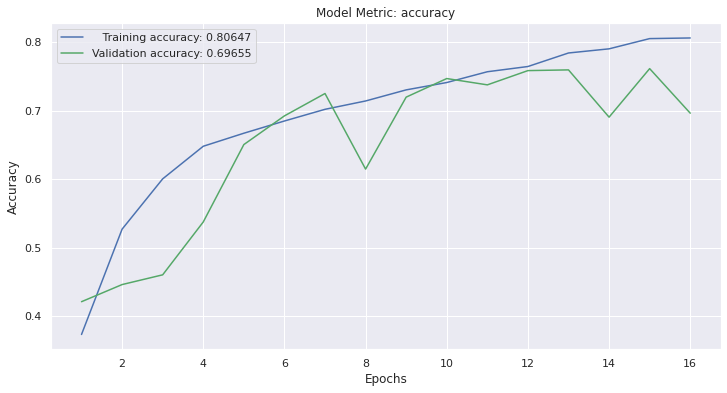

In [ ]:
plot_keras_history(history_model_e)

*Model 5 CNN - Using hyperparameter tunning - (without using one hot encoding for ethnicity) - Best for ethnicity*

In [ ]:
def model_builder_ethn(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(48, 48)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 40-800
  hp_units = hp.Int('units', min_value=40, max_value=800, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  model._name = "Model5"
  return model

In [ ]:
tuner_e = kt.Hyperband(model_builder_ethn,
                     objective='val_loss',
                     max_epochs=12,
                     factor=5)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner_e.search(X_train_e, y_train_e, epochs=50, validation_data= (X_val_e,y_val_e), callbacks=[stop_early])
# Get the optimal hyperparameters
best_hps=tuner_e.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.0001.



In [ ]:
# Train the model

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_eh = tuner_e.hypermodel.build(best_hps)
history_eh = model_eh.fit(X_train_e, y_train_e, epochs=50, validation_data= (X_val_e,y_val_e), class_weight=class_weight_e) #class_wights created using one hot data

val_acc_per_epoch = history_eh.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
475/475 [==============================] - 2s 4ms/step - loss: 3.0003 - accuracy: 0.4245 - val_loss: 1.2337 - val_accuracy: 0.5381
Epoch 2/50
475/475 [==============================] - 2s 3ms/step - loss: 2.5527 - accuracy: 0.5572 - val_loss: 1.2832 - val_accuracy: 0.5094
Epoch 3/50
475/475 [==============================] - 2s 3ms/step - loss: 2.4169 - accuracy: 0.5778 - val_loss: 1.1309 - val_accuracy: 0.5579
Epoch 4/50
475/475 [==============================] - 2s 3ms/step - loss: 2.2842 - accuracy: 0.6072 - val_loss: 0.9415 - val_accuracy: 0.6639
Epoch 5/50
475/475 [==============================] - 2s 3ms/step - loss: 2.2193 - accuracy: 0.6158 - val_loss: 1.0315 - val_accuracy: 0.6061
Epoch 6/50
475/475 [==============================] - 2s 3ms/step - loss: 2.1822 - accuracy: 0.6241 - val_loss: 0.9241 - val_accuracy: 0.6733
Epoch 7/50
475/475 [==============================] - 2s 3ms/step - loss: 2.1393 - accuracy: 0.6274 - val_loss: 0.9791 - val_accuracy: 0.6320
Epoch 

In [ ]:
# Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel_e = tuner_e.hypermodel.build(best_hps)

# Retrain the model
history_model_eh= hypermodel_e.fit(X_train_e, y_train_e, epochs=best_epoch,validation_data= (X_val_e,y_val_e))

Epoch 1/50
475/475 [==============================] - 2s 3ms/step - loss: 1.2169 - accuracy: 0.5343 - val_loss: 1.1662 - val_accuracy: 0.5732
Epoch 2/50
475/475 [==============================] - 1s 3ms/step - loss: 1.0396 - accuracy: 0.6234 - val_loss: 1.0179 - val_accuracy: 0.6501
Epoch 3/50
475/475 [==============================] - 2s 3ms/step - loss: 0.9660 - accuracy: 0.6551 - val_loss: 0.9983 - val_accuracy: 0.6528
Epoch 4/50
475/475 [==============================] - 2s 3ms/step - loss: 0.9297 - accuracy: 0.6659 - val_loss: 0.9089 - val_accuracy: 0.6723
Epoch 5/50
475/475 [==============================] - 1s 3ms/step - loss: 0.8999 - accuracy: 0.6789 - val_loss: 0.8779 - val_accuracy: 0.6900
Epoch 6/50
475/475 [==============================] - 1s 3ms/step - loss: 0.8734 - accuracy: 0.6940 - val_loss: 0.9084 - val_accuracy: 0.6715
Epoch 7/50
475/475 [==============================] - 1s 3ms/step - loss: 0.8629 - accuracy: 0.6970 - val_loss: 0.9115 - val_accuracy: 0.6789
Epoch 

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
hypermodel_e.summary()

Model: "Model5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 2304)              0         
                                                                 
 dense_16 (Dense)            (None, 448)               1032640   
                                                                 
 dense_17 (Dense)            (None, 5)                 2245      
                                                                 
Total params: 1,034,885
Trainable params: 1,034,885
Non-trainable params: 0
_________________________________________________________________


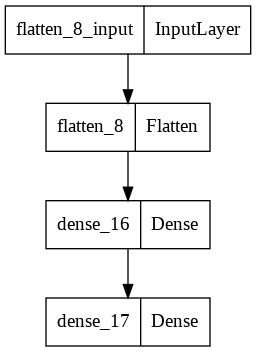

In [ ]:
plot_model(hypermodel_e)

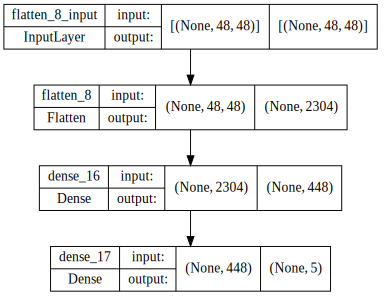

In [ ]:
SVG(model_to_dot(hypermodel_e, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

Evaluating the hypermodel on test data

In [ ]:
eval_result = hypermodel_e.evaluate(X_val_e, y_val_e) #verbose=1
print("[test loss, test accuracy]:", eval_result)

119/119 [==============================] - 0s 2ms/step - loss: 0.7528 - accuracy: 0.7353
[test loss, test accuracy]: [0.7528499364852905, 0.7353018522262573]


In [ ]:
score = hypermodel_e.evaluate(
    X_val_e, y_val_e,              # labels
    batch_size=200,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

19/19 - 0s - loss: 0.7529 - accuracy: 0.7353 - 79ms/epoch - 4ms/step

Test categorical_crossentropy: 0.7528501152992249

Test accuracy: 73.530 %


Saving the model and weights

In [ ]:
# saving the model to json format
open('hypermodel_eh.json', 'w').write(hypermodel_e.to_json())
# saving the weights_g of the model separately
hypermodel_e.save_weights('weights_hyper_eh.h5')

Model Predictions

In [ ]:
eval_result = hypermodel_e.evaluate(X_test_e, y_test_e) #verbose=1
print("[test loss, test accuracy]:", eval_result)

149/149 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.7325
[test loss, test accuracy]: [0.7778974771499634, 0.7325458526611328]


In [ ]:
score = hypermodel_e.evaluate(
    X_test_e, y_test_e,              # labels
    batch_size=200,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

24/24 - 0s - loss: 0.7779 - accuracy: 0.7325 - 177ms/epoch - 7ms/step

Test categorical_crossentropy: 0.7778976559638977

Test accuracy: 73.255 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_eh =hypermodel_e.predict(X_test_e)
y_test_pred_probs_eh

array([[-0.988032  , -0.54427266, -0.9252537 ,  1.6313689 , -1.0834982 ],
       [ 3.7425358 , -2.3186135 , -4.605689  , -1.0109011 , -0.1009476 ],
       [ 1.9699333 , -4.9826064 ,  2.8565116 , -2.5873997 ,  0.2896155 ],
       ...,
       [ 2.430198  , -2.781736  ,  0.28126308, -1.7197673 , -1.4484575 ],
       [ 0.70558834, -5.648078  ,  6.5944934 , -4.007816  , -1.2791669 ],
       [ 2.824525  , -1.3599823 ,  2.2004578 , -4.2459326 , -2.074372  ]],
      dtype=float32)

In [ ]:
y_test_pred_probs_eh.shape

(4741, 5)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_eh = np.argmax(model_eh.predict(X_test_e), axis=-1)

y_test_preds_eh[:50]

array([3, 0, 2, 1, 3, 3, 1, 1, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 1, 2, 3, 3,
       0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 2, 4, 1, 3, 0, 1, 3, 0, 1,
       3, 1, 0, 0, 1, 0])

In [ ]:
y_test_pred_eh = get_one_hot_predictions(y_test_pred_probs_eh)
y_test_pred_eh


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Confusion matrix and evaluation Metrics

Text(0.5, 12.5, 'Predicted label')

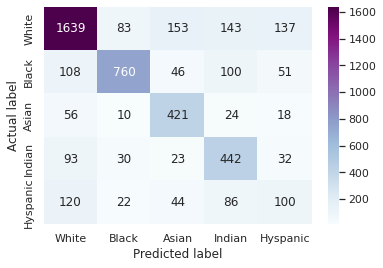

In [ ]:
sns.heatmap(confusion_matrix(y_test_preds_eh,y_test_e),annot = True, fmt = 'd', cmap = "BuPu",xticklabels = ["White","Black","Asian","Indian","Hyspanic"],yticklabels = ["White","Black","Asian","Indian","Hyspanic"])
#["White","Black","Asian","Indian","Hispanic"]
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print(classification_report(y_true=y_test_e,
                            y_pred=y_test_preds_eh))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      2016
           1       0.71      0.84      0.77       905
           2       0.80      0.61      0.69       687
           3       0.71      0.56      0.62       795
           4       0.27      0.30      0.28       338

    accuracy                           0.71      4741
   macro avg       0.65      0.62      0.63      4741
weighted avg       0.71      0.71      0.71      4741



Visualizations


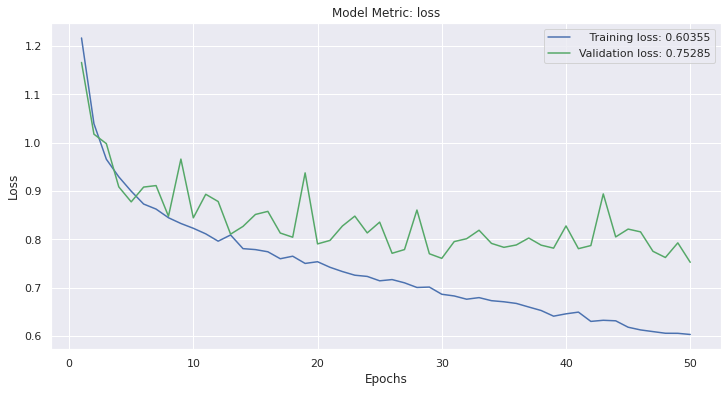

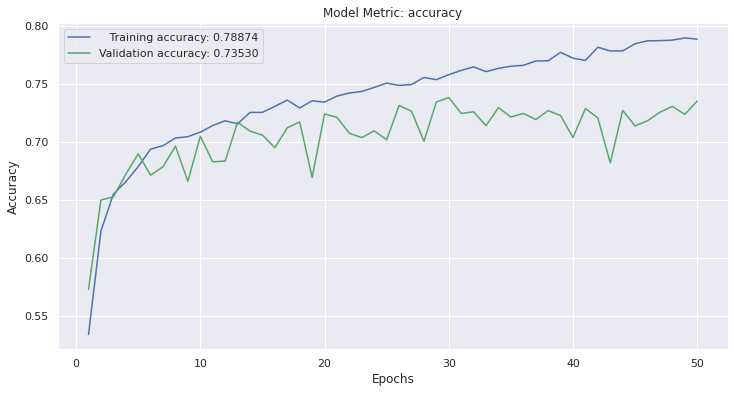

In [ ]:
plot_keras_history(history_model_eh)

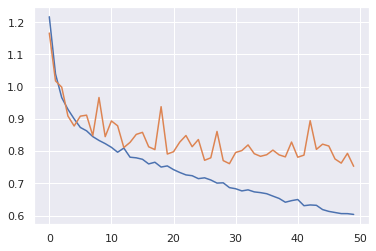

In [ ]:
plt.plot(history_model_eh.history['loss'])
plt.plot(history_model_eh.history['val_loss'])
plt.show()

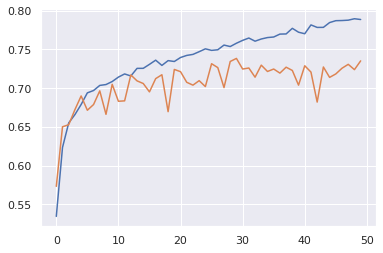

In [ ]:
plt.plot(history_model_eh.history['accuracy'])
plt.plot(history_model_eh.history['val_accuracy'])
plt.show()

*Model 6 - RNN GRU (without one hot encoding)*

In [ ]:
# Train and Fit the GRU RNN Model for gender

In [ ]:
model_egru = keras.Sequential()
model_egru.add(layers.GRU(64, input_shape=(48, 48)))
model_egru.add(layers.BatchNormalization())
model_egru.add(layers.Dense(5))
model_egru._name = "Model6"
print(model_egru.summary())


Model: "Model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                21888     
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_37 (Dense)            (None, 5)                 325       
                                                                 
Total params: 22,469
Trainable params: 22,341
Non-trainable params: 128
_________________________________________________________________
None


In [ ]:
model_egru.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)	

In [ ]:
es = EarlyStopping(
    monitor   = 'val_loss', # which metric we want to use as criterion to stop training
    min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 3, # 3 epochs before stopping
    verbose   = 1, # verbosity level
    mode      = 'auto',
    restore_best_weights = True)

In [ ]:
history_model_egru= model_egru.fit(
    X_train_e, y_train_e, validation_data=(X_val_e, y_val_e), batch_size=64, epochs=10, callbacks = [es]
)

Epoch 1/10
238/238 [==============================] - 4s 8ms/step - loss: 1.3995 - accuracy: 0.4499 - val_loss: 1.3880 - val_accuracy: 0.4440
Epoch 2/10
238/238 [==============================] - 2s 6ms/step - loss: 1.3015 - accuracy: 0.4943 - val_loss: 1.4915 - val_accuracy: 0.3443
Epoch 3/10
238/238 [==============================] - 2s 6ms/step - loss: 1.2462 - accuracy: 0.5151 - val_loss: 1.2323 - val_accuracy: 0.5281
Epoch 4/10
238/238 [==============================] - 2s 6ms/step - loss: 1.1763 - accuracy: 0.5482 - val_loss: 1.2945 - val_accuracy: 0.5273
Epoch 5/10
238/238 [==============================] - 2s 6ms/step - loss: 1.1020 - accuracy: 0.5834 - val_loss: 1.1600 - val_accuracy: 0.5626
Epoch 6/10
238/238 [==============================] - 1s 6ms/step - loss: 1.0324 - accuracy: 0.6195 - val_loss: 1.0731 - val_accuracy: 0.5979
Epoch 7/10
238/238 [==============================] - 2s 6ms/step - loss: 0.9940 - accuracy: 0.6379 - val_loss: 1.5343 - val_accuracy: 0.4529
Epoch 

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
model_egru.summary()

Model: "Model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                21888     
                                                                 
 batch_normalization_10 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_37 (Dense)            (None, 5)                 325       
                                                                 
Total params: 22,469
Trainable params: 22,341
Non-trainable params: 128
_________________________________________________________________


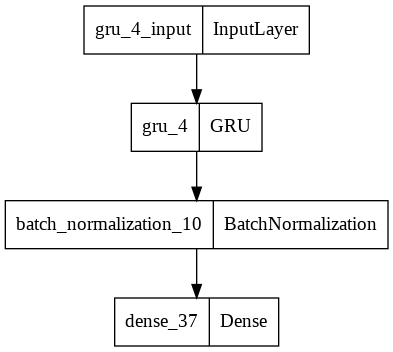

In [ ]:
plot_model(model_egru)

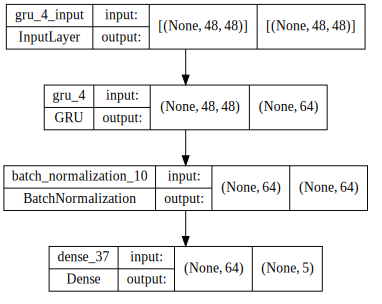

In [ ]:
SVG(model_to_dot(model_egru, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

Saving the model and weights

In [ ]:
# saving the model to json format
open('model_egru.json', 'w').write(model_egru.to_json())
# saving the weights_g of the model separately
model_e.save_weights('weights_egru.h5')

Model evaluation

In [ ]:
model_egru.evaluate(X_val_e, y_val_e, verbose=1)

119/119 [==============================] - 0s 4ms/step - loss: 0.9602 - accuracy: 0.6422


[0.9602137207984924, 0.6422356963157654]

In [ ]:
score = model_egru.evaluate(
    X_val_e, y_val_e,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

19/19 - 0s - loss: 0.9602 - accuracy: 0.6422 - 93ms/epoch - 5ms/step

Test categorical_crossentropy: 0.9602134227752686

Test accuracy: 64.224 %


Model Predictions

In [ ]:
eval_result = model_egru.evaluate(X_test_e, y_test_e) #verbose=1
print("[test loss, test accuracy]:", eval_result)

score = model_egru.evaluate(
    X_test_e, y_test_e,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

149/149 [==============================] - 1s 4ms/step - loss: 0.9847 - accuracy: 0.6423
[test loss, test accuracy]: [0.9846785068511963, 0.6422695517539978]
24/24 - 0s - loss: 0.9847 - accuracy: 0.6423 - 113ms/epoch - 5ms/step

Test categorical_crossentropy: 0.984678328037262

Test accuracy: 64.227 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_egru =model_egru.predict(X_test_e)
y_test_pred_probs_egru

array([[ 0.20753142, -0.24050587, -0.90544546,  1.1969347 , -0.44061908],
       [ 3.1717086 , -1.3502854 , -2.7566936 ,  0.16796212, -0.074289  ],
       [ 0.13955887, -3.6389732 ,  3.1136935 , -1.1221763 , -0.26206324],
       ...,
       [ 2.353887  , -1.4166789 , -0.34457034,  0.8196326 ,  0.0966005 ],
       [ 0.05573037, -3.612631  ,  4.0573273 , -1.9108864 , -1.6356866 ],
       [ 1.0199792 , -1.9063278 , -0.2956294 ,  0.8627675 , -1.1852173 ]],
      dtype=float32)

In [ ]:
y_test_pred_probs_egru.shape

(4741, 5)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_egru = np.argmax(model_egru.predict(X_test_e), axis=-1)

y_test_preds_egru[:50]

array([3, 0, 2, 1, 3, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 3, 2, 0, 1, 2, 3, 3,
       0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 0, 2, 0, 1, 3, 0, 1, 3, 0, 3,
       3, 1, 0, 0, 1, 0])

In [ ]:
y_test_pred_egru = get_one_hot_predictions(y_test_pred_probs_egru)
y_test_pred_egru


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

Confusion matrix and evaluation metrics

Text(0.5, 12.5, 'Predicted label')

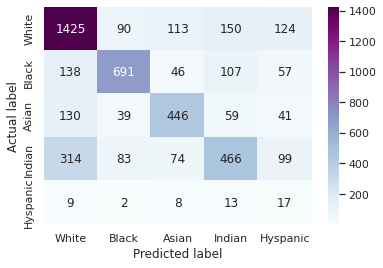

In [ ]:
sns.heatmap(confusion_matrix(y_test_preds_egru,y_test_e),annot = True, fmt = 'd', cmap = "BuPu",xticklabels = ["White","Black","Asian","Indian","Hyspanic"],yticklabels = ["White","Black","Asian","Indian","Hyspanic"])
#["White","Black","Asian","Indian","Hispanic"]
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print(classification_report(y_true=y_test_e,
                            y_pred=y_test_preds_egru))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2016
           1       0.67      0.76      0.71       905
           2       0.62      0.65      0.64       687
           3       0.45      0.59      0.51       795
           4       0.35      0.05      0.09       338

    accuracy                           0.64      4741
   macro avg       0.57      0.55      0.53      4741
weighted avg       0.64      0.64      0.63      4741



Visualizations

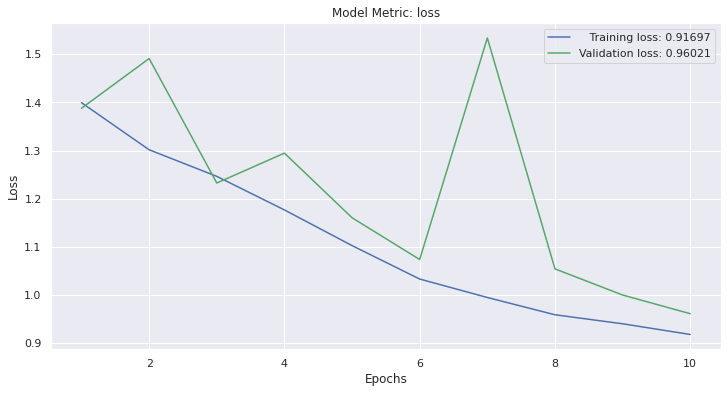

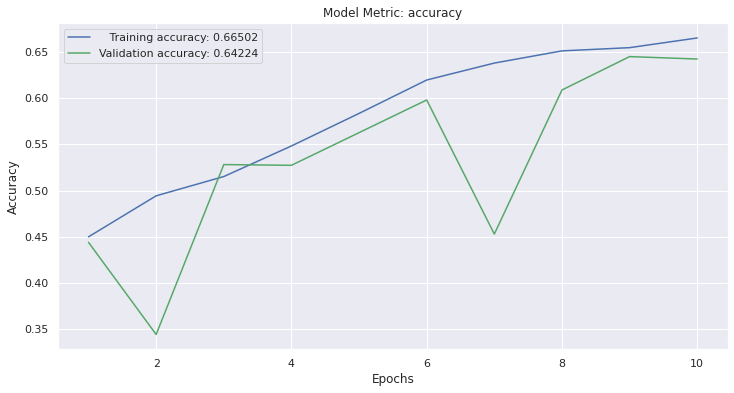

In [ ]:
plot_keras_history(history_model_egru)

*AGE *

Model 7 - CNN

In [ ]:
model_a = Sequential()

model_a.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))
model_a.add(MaxPooling2D(2,2))

model_a.add(Conv2D(64,(3,3),activation='relu'))
model_a.add(MaxPooling2D(2,2))

model_a.add(Conv2D(64,(3,3),activation='relu'))
model_a.add(MaxPooling2D(2,2))

model_a.add(Flatten())
model_a.add(Dense(7,activation='softmax'))
model_a._name = "Model7"


In [ ]:
model_a.compile(optimizer=Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [ ]:
es = EarlyStopping(
    monitor   = 'val_loss', # which metric we want to use as criterion to stop training
    min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 5, # we 3 epochs before stopping
    verbose   = 1, # verbosity level
    mode      = 'auto',
    restore_best_weights = True)


In [ ]:
# Setting model hyperparameters
batch_size = 1024
epochs = 180

In [ ]:
class_weight_a = {c: w for c, w in enumerate(class_weight_a)}

In [ ]:
class_weight_a

{0: 2.3132588635259834,
 1: 5.822738386308068,
 2: 1.0,
 3: 1.4700617283950617,
 4: 2.42886282508924,
 5: 3.5203252032520327,
 6: 4.8751279426816785}

In [ ]:
history_model_a = model_a.fit(
    X_train_a,
    y_train_enc_a,
    batch_size = batch_size,
    class_weight=class_weight_a,
    epochs = epochs,
    verbose = 1,
    validation_data= (X_val_a,y_val_enc_a),
    callbacks = [es])

Epoch 1/180
15/15 [==============================] - 3s 84ms/step - loss: 4.2642 - accuracy: 0.1673 - val_loss: 1.9104 - val_accuracy: 0.2270
Epoch 2/180
15/15 [==============================] - 1s 67ms/step - loss: 4.1390 - accuracy: 0.2875 - val_loss: 1.7527 - val_accuracy: 0.3607
Epoch 3/180
15/15 [==============================] - 1s 64ms/step - loss: 3.8331 - accuracy: 0.3151 - val_loss: 1.7617 - val_accuracy: 0.2581
Epoch 4/180
15/15 [==============================] - 1s 64ms/step - loss: 3.5662 - accuracy: 0.3405 - val_loss: 1.5947 - val_accuracy: 0.3504
Epoch 5/180
15/15 [==============================] - 1s 68ms/step - loss: 3.3555 - accuracy: 0.3766 - val_loss: 1.5661 - val_accuracy: 0.3319
Epoch 6/180
15/15 [==============================] - 1s 64ms/step - loss: 3.2460 - accuracy: 0.3855 - val_loss: 1.4836 - val_accuracy: 0.3680
Epoch 7/180
15/15 [==============================] - 1s 64ms/step - loss: 3.1735 - accuracy: 0.3953 - val_loss: 1.4678 - val_accuracy: 0.3825
Epoch 

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
model_a.summary()

Model: "Model7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0    

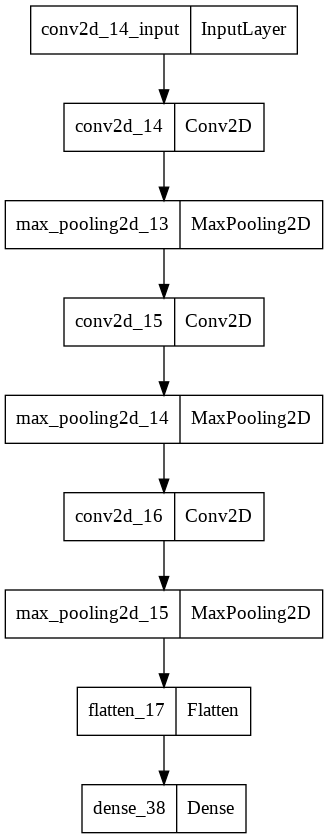

In [ ]:
plot_model(model_a)

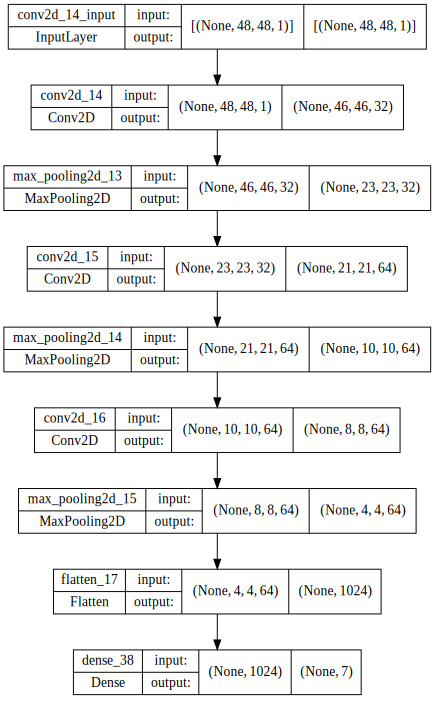

In [ ]:
SVG(model_to_dot(model_a, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

Saving the model and weights

In [ ]:
# saving the model to json format
open('model_a.json', 'w').write(model_a.to_json())
# saving the weights_g of the model separately
model_a.save_weights('weights_a.h5')

Model evaluation

In [ ]:
model_a.evaluate(X_val_a, y_val_enc_a, verbose=1)

119/119 [==============================] - 0s 3ms/step - loss: 1.3066 - accuracy: 0.4653


[1.306612253189087, 0.4653308689594269]

In [ ]:
score = model_a.evaluate(
   X_val_a, y_val_enc_a  ,          # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

4/4 - 0s - loss: 1.3066 - accuracy: 0.4653 - 102ms/epoch - 25ms/step

Test categorical_crossentropy: 1.306612491607666

Test accuracy: 46.533 %


Model Predictions

In [ ]:
model_a.evaluate(X_test_a, y_test_enc_a, verbose=1)

149/149 [==============================] - 1s 4ms/step - loss: 1.3055 - accuracy: 0.4769


[1.3055182695388794, 0.47690361738204956]

In [ ]:
score = model_a.evaluate(
    X_test_a, y_test_enc_a,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

5/5 - 0s - loss: 1.3055 - accuracy: 0.4769 - 136ms/epoch - 27ms/step

Test categorical_crossentropy: 1.3055177927017212

Test accuracy: 47.690 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_a = model_a.predict(X_test_a)
y_test_pred_probs_a

array([[9.7831362e-01, 1.2677312e-02, 5.2645612e-03, ..., 8.4407144e-04,
        5.8523798e-04, 9.8780298e-04],
       [2.2380020e-02, 5.6638423e-02, 5.7092786e-02, ..., 1.4370410e-01,
        2.8204945e-01, 3.7058285e-01],
       [4.6642106e-03, 5.2525666e-02, 5.1130209e-02, ..., 4.9779510e-01,
        1.8445522e-01, 4.5204662e-02],
       ...,
       [2.5841082e-02, 5.0097059e-02, 2.5682563e-01, ..., 2.9534474e-01,
        1.2917452e-01, 2.5305921e-02],
       [1.8148357e-04, 1.3043813e-02, 5.8000386e-01, ..., 8.8616580e-02,
        1.3534034e-02, 8.6618954e-04],
       [3.6345754e-02, 1.4224769e-01, 1.1590871e-01, ..., 2.3689564e-01,
        7.2957598e-02, 1.3180959e-01]], dtype=float32)

In [ ]:
y_test_pred_probs_a.shape

(4741, 7)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_a = np.argmax(model_a.predict(X_test_a), axis=-1)

y_test_preds_a[:50]

array([0, 6, 4, 2, 4, 2, 2, 2, 2, 0, 2, 3, 0, 4, 2, 2, 0, 0, 6, 4, 4, 2,
       1, 2, 3, 3, 5, 1, 6, 2, 2, 0, 2, 2, 0, 2, 2, 1, 4, 2, 4, 4, 2, 2,
       0, 1, 1, 4, 2, 0])

In [ ]:
y_test_preds_a = get_one_hot_predictions(y_test_pred_probs_a)
y_test_preds_a


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Evaluation metrics

In [ ]:
print(classification_report(y_true=y_test_a,
                            y_pred=y_test_preds_a))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       644
           1       0.17      0.29      0.22       255
           2       0.58      0.67      0.62      1488
           3       0.39      0.13      0.19      1012
           4       0.31      0.53      0.39       613
           5       0.34      0.14      0.20       423
           6       0.47      0.49      0.48       306

   micro avg       0.48      0.48      0.48      4741
   macro avg       0.43      0.44      0.41      4741
weighted avg       0.47      0.48      0.45      4741
 samples avg       0.48      0.48      0.48      4741



Visualizations

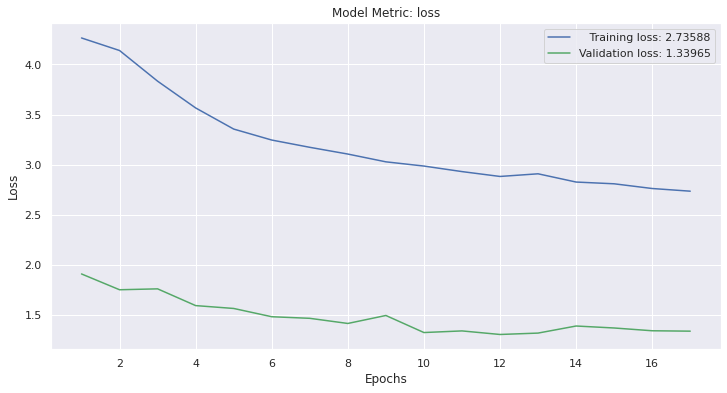

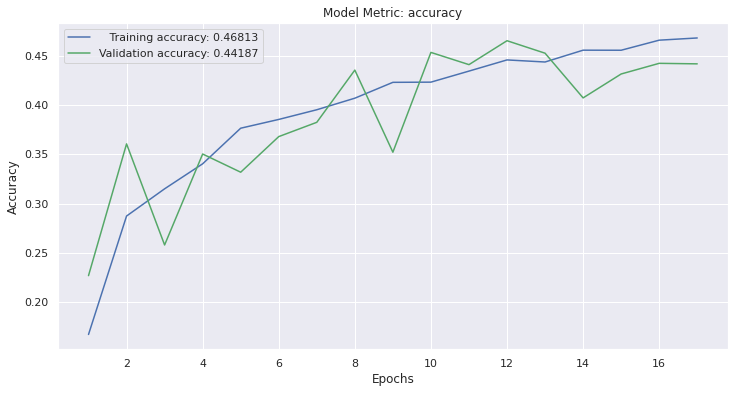

In [ ]:
plot_keras_history(history_model_a)

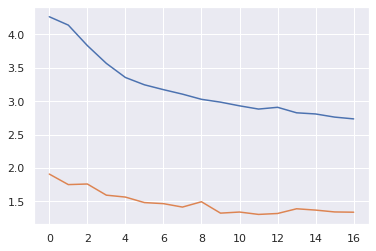

In [ ]:
plt.plot(history_model_a.history['loss'])
plt.plot(history_model_a.history['val_loss'])
plt.show()

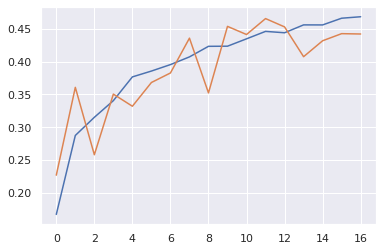

In [ ]:
plt.plot(history_model_a.history['accuracy'])
plt.plot(history_model_a.history['val_accuracy'])
plt.show()



MODEL 8 - without class weights - Best for age

In [ ]:
model_aa = Sequential() 
model_aa.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
model_aa.add(BatchNormalization())
model_aa.add(MaxPool2D(pool_size=(2, 2)))
model_aa.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
model_aa.add(BatchNormalization())
model_aa.add(MaxPool2D(pool_size=(2, 2)))
model_aa.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
model_aa.add(MaxPool2D(pool_size=(2, 2)))
model_aa.add(Flatten())
model_aa.add(Dense(256, activation='relu'))
model_aa.add(Dropout(0.5))
model_aa.add(Dense(7, activation= 'softmax'))
model_aa.compile(optimizer='Adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
model_aa._name = "Model8"

In [ ]:
# setting the early stoping callback
es = EarlyStopping(monitor='val_loss',
                   patience=4,
                   verbose=1,
                   restore_best_weights=True)


In [ ]:
history_model_aa = model_aa.fit(
    X_train_a,
    y_train_enc_a,
    batch_size = 400,
    # class_weight=class_weight_a,
    epochs = 180,
    verbose = 1,
    validation_data= (X_val_a,y_val_enc_a),
    callbacks = [es])

Epoch 1/180
38/38 [==============================] - 2s 44ms/step - loss: 2.2660 - accuracy: 0.3099 - val_loss: 1.9238 - val_accuracy: 0.2022
Epoch 2/180
38/38 [==============================] - 1s 38ms/step - loss: 1.6148 - accuracy: 0.3861 - val_loss: 1.9101 - val_accuracy: 0.1901
Epoch 3/180
38/38 [==============================] - 1s 38ms/step - loss: 1.4287 - accuracy: 0.4395 - val_loss: 1.9095 - val_accuracy: 0.2128
Epoch 4/180
38/38 [==============================] - 1s 38ms/step - loss: 1.3023 - accuracy: 0.4819 - val_loss: 1.8321 - val_accuracy: 0.2610
Epoch 5/180
38/38 [==============================] - 1s 38ms/step - loss: 1.2260 - accuracy: 0.5049 - val_loss: 1.7410 - val_accuracy: 0.3593
Epoch 6/180
38/38 [==============================] - 1s 38ms/step - loss: 1.1874 - accuracy: 0.5170 - val_loss: 1.6621 - val_accuracy: 0.3538
Epoch 7/180
38/38 [==============================] - 1s 38ms/step - loss: 1.1394 - accuracy: 0.5337 - val_loss: 1.6352 - val_accuracy: 0.3696
Epoch 

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
model_aa.summary()

Model: "Model8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                            

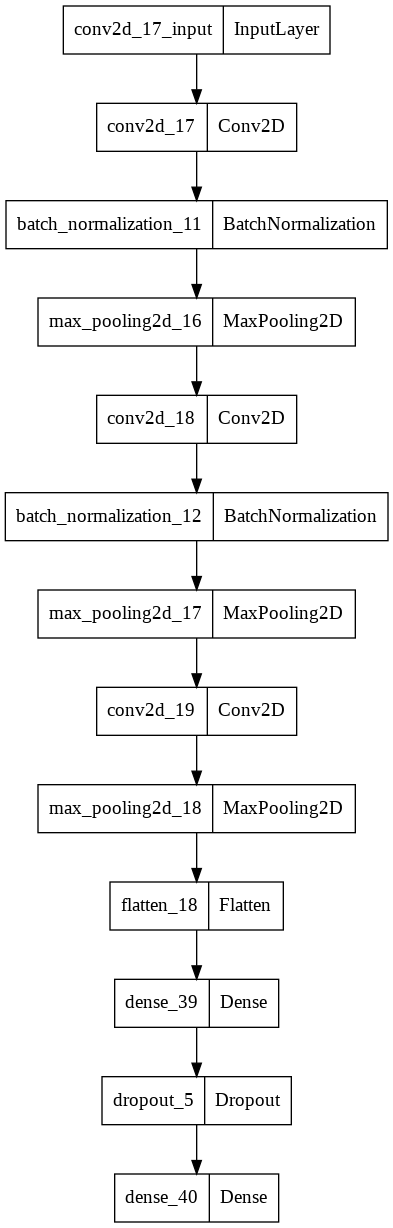

In [ ]:
plot_model(model_aa)

conv2d_17 (3, 3, 64, 64)
32


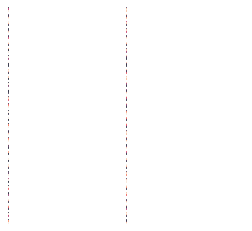

conv2d_18 (3, 3, 1, 32)
64


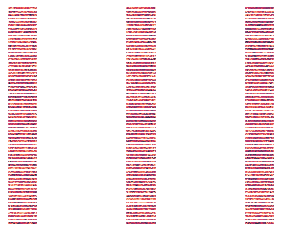

conv2d_19 (3, 3, 32, 64)
64


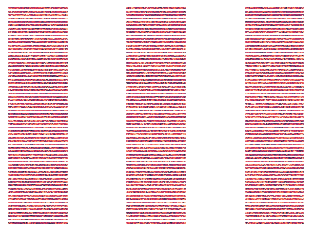

In [ ]:
# Iterate thru all the layers of the model
for layer in model_aa.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

Saving the model and weights

In [ ]:
# saving the model to json format
open('model_aa.json', 'w').write(model_a.to_json())
# saving the weights_g of the model separately
model_aa.save_weights('weights_aa.h5')

Model evaluation

In [ ]:
model_aa.evaluate(X_val_a, y_val_enc_a, verbose=1)

119/119 [==============================] - 0s 4ms/step - loss: 1.0698 - accuracy: 0.5658


[1.0698493719100952, 0.5657790899276733]

In [ ]:
score = model_aa.evaluate(
    X_val_a, y_val_enc_a,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

4/4 - 0s - loss: 1.0698 - accuracy: 0.5658 - 147ms/epoch - 37ms/step

Test categorical_crossentropy: 1.0698492527008057

Test accuracy: 56.578 %


Model Predictions

In [ ]:
model_aa.evaluate(X_test_a, y_test_enc_a, verbose=1)

149/149 [==============================] - 1s 4ms/step - loss: 1.0891 - accuracy: 0.5609


[1.0891222953796387, 0.5608521699905396]

In [ ]:
score = model_aa.evaluate(
    X_test_a, y_test_enc_a,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

5/5 - 0s - loss: 1.0891 - accuracy: 0.5609 - 154ms/epoch - 31ms/step

Test categorical_crossentropy: 1.0891221761703491

Test accuracy: 56.085 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_aa = model_aa.predict(X_test_a)
y_test_pred_probs_aa

array([[9.9996114e-01, 3.8725746e-05, 8.2662240e-08, ..., 4.4967502e-10,
        3.1299331e-11, 6.1995672e-11],
       [1.0338293e-02, 6.0599609e-03, 2.9057739e-03, ..., 1.1828085e-01,
        2.9375136e-01, 5.6218678e-01],
       [3.9263847e-01, 4.1257523e-02, 7.8207254e-02, ..., 1.2700553e-01,
        3.4764964e-02, 3.0557024e-03],
       ...,
       [5.1500615e-02, 1.2996699e-02, 1.3200875e-01, ..., 2.9964033e-01,
        9.1183275e-02, 1.5639739e-01],
       [1.2697236e-05, 1.0933904e-02, 7.8219932e-01, ..., 1.6849637e-03,
        1.0131173e-05, 6.8741484e-09],
       [6.5986067e-03, 6.9275104e-02, 3.3740035e-01, ..., 1.6243020e-01,
        9.7538522e-03, 5.8881938e-04]], dtype=float32)

In [ ]:
y_test_pred_probs_aa.shape

(4741, 7)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_aa = np.argmax(model_aa.predict(X_test_a), axis=-1)

y_test_preds_aa[:50]

array([0, 6, 0, 2, 4, 2, 2, 2, 2, 0, 2, 3, 3, 6, 2, 2, 3, 0, 3, 0, 3, 2,
       2, 2, 2, 5, 4, 3, 6, 2, 2, 0, 4, 2, 0, 2, 2, 2, 1, 2, 4, 4, 2, 2,
       0, 2, 1, 4, 2, 0])

In [ ]:
y_test_preds_aa = get_one_hot_predictions(y_test_pred_probs_aa)
y_test_preds_aa


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Evaluation metrics

In [ ]:
print(classification_report(y_true=y_test_a,
                            y_pred=y_test_preds_aa))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       644
           1       0.38      0.20      0.26       255
           2       0.60      0.83      0.69      1488
           3       0.43      0.26      0.32      1012
           4       0.39      0.48      0.43       613
           5       0.45      0.14      0.21       423
           6       0.64      0.56      0.59       306

   micro avg       0.56      0.56      0.56      4741
   macro avg       0.52      0.48      0.48      4741
weighted avg       0.53      0.56      0.53      4741
 samples avg       0.56      0.56      0.56      4741



Visualizations

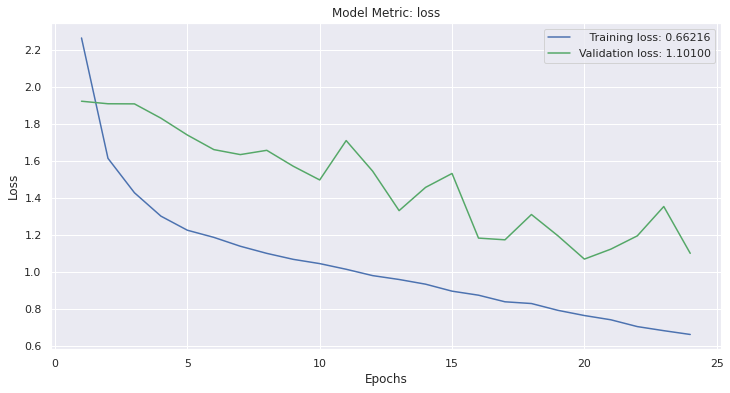

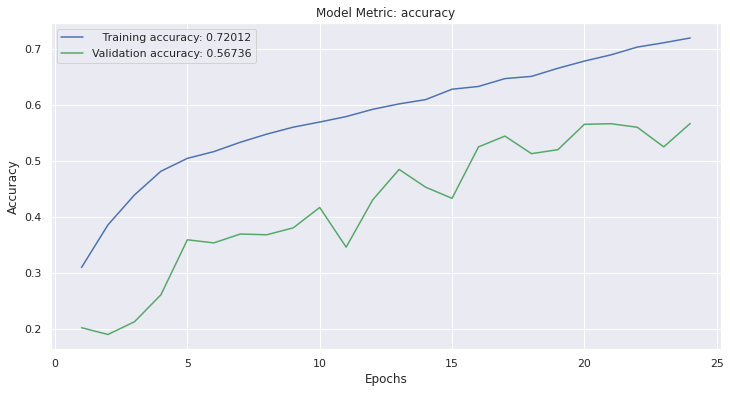

In [ ]:
plot_keras_history(history_model_aa)

*Model 9 - RNN GRU (without one hot encoding)*

In [ ]:
# Train and Fit the GRU RNN Model for gender

In [ ]:
model_agru = keras.Sequential()
model_agru.add(layers.GRU(64, input_shape=(48, 48)))
model_agru.add(layers.BatchNormalization())
model_agru.add(layers.Dense(7))
model_agru._name = "Model9"
print(model_agru.summary())
``

Model: "Model9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 64)                21888     
                                                                 
 batch_normalization_13 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_41 (Dense)            (None, 7)                 455       
                                                                 
Total params: 22,599
Trainable params: 22,471
Non-trainable params: 128
_________________________________________________________________
None


In [ ]:
model_agru.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)	

In [ ]:
es = EarlyStopping(
    monitor   = 'val_loss', # which metric we want to use as criterion to stop training
    min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
    patience  = 3, # 3 epochs before stopping
    verbose   = 1, # verbosity level
    mode      = 'auto',
    restore_best_weights = True)

In [ ]:
history_model_agru= model_agru.fit(
    X_train_a, y_train_a, validation_data=(X_val_a, y_val_a), batch_size=64, epochs=10, callbacks = [es],class_weight=class_weight_a
)

Epoch 1/10
238/238 [==============================] - 4s 9ms/step - loss: 3.1943 - accuracy: 0.3781 - val_loss: 1.4946 - val_accuracy: 0.3886
Epoch 2/10
238/238 [==============================] - 2s 7ms/step - loss: 3.1264 - accuracy: 0.3868 - val_loss: 1.6822 - val_accuracy: 0.3303
Epoch 3/10
238/238 [==============================] - 2s 7ms/step - loss: 3.0878 - accuracy: 0.3959 - val_loss: 1.6129 - val_accuracy: 0.3443
Epoch 4/10
238/238 [==============================] - 2s 7ms/step - loss: 3.0409 - accuracy: 0.3985 - val_loss: 1.4025 - val_accuracy: 0.4390
Epoch 5/10
238/238 [==============================] - 2s 7ms/step - loss: 3.0230 - accuracy: 0.4003 - val_loss: 1.3982 - val_accuracy: 0.4242
Epoch 6/10
238/238 [==============================] - 2s 7ms/step - loss: 2.9731 - accuracy: 0.4125 - val_loss: 1.6044 - val_accuracy: 0.3459
Epoch 7/10
238/238 [==============================] - 2s 7ms/step - loss: 2.9434 - accuracy: 0.4124 - val_loss: 1.4630 - val_accuracy: 0.4126
Epoch 

**RESULTS & QUANTITATIVE ANALYSIS  (incl. visualizations)**


In [ ]:
model_agru.summary()

Model: "Model9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 64)                21888     
                                                                 
 batch_normalization_13 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_41 (Dense)            (None, 7)                 455       
                                                                 
Total params: 22,599
Trainable params: 22,471
Non-trainable params: 128
_________________________________________________________________


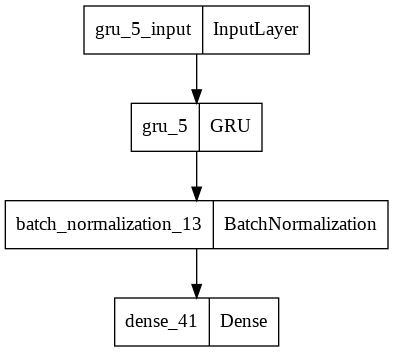

In [ ]:
plot_model(model_agru)

Saving the model and weights

In [ ]:
# saving the model to json format
open('model_agru.json', 'w').write(model_agru.to_json())
# saving the weights_g of the model separately
model_agru.save_weights('weights_agru.h5')

Model Evaluation

In [ ]:
model_agru.evaluate(X_val_a, y_val_a, verbose=1)

119/119 [==============================] - 0s 4ms/step - loss: 1.3982 - accuracy: 0.4242


[1.3982439041137695, 0.42420247197151184]

In [ ]:
score = model_agru.evaluate(
    X_val_a, y_val_a,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

4/4 - 0s - loss: 1.3982 - accuracy: 0.4242 - 47ms/epoch - 12ms/step

Test categorical_crossentropy: 1.39824378490448

Test accuracy: 42.420 %


Model Predictions

In [ ]:
model_agru.evaluate(X_test_a, y_test_a, verbose=1)

149/149 [==============================] - 1s 4ms/step - loss: 1.3838 - accuracy: 0.4235


[1.38376784324646, 0.42353934049606323]

In [ ]:
score = model_agru.evaluate(
    X_test_a, y_test_a,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))

5/5 - 0s - loss: 1.3838 - accuracy: 0.4235 - 54ms/epoch - 11ms/step

Test categorical_crossentropy: 1.3837677240371704

Test accuracy: 42.354 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs_agru =model_agru.predict(X_test_a)
y_test_pred_probs_agru

array([[ 5.441811  ,  1.6459305 ,  0.45843816, ..., -1.2426406 ,
        -1.5420756 , -3.4175239 ],
       [-4.2922683 , -1.8402163 , -0.56096256, ...,  0.7288495 ,
         1.4947364 ,  1.3240529 ],
       [ 3.0862384 ,  2.4937627 ,  2.5136282 , ...,  0.421335  ,
        -2.0683665 , -5.8039627 ],
       ...,
       [-3.59413   , -1.8223649 , -1.0444239 , ...,  1.6133176 ,
         1.1566396 , -0.35269928],
       [-2.8684793 ,  1.2412585 ,  3.5509236 , ...,  2.1840756 ,
         0.17741364, -2.7884536 ],
       [-4.3024707 , -1.3743938 ,  0.0818074 , ...,  1.0799097 ,
         0.19748399, -0.01216263]], dtype=float32)

In [ ]:
y_test_pred_probs_agru.shape

(4741, 7)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)

y_test_preds_agru = np.argmax(model_agru.predict(X_test_a), axis=-1)

y_test_preds_agru[:50]

array([0, 5, 0, 2, 4, 4, 2, 4, 2, 0, 2, 3, 2, 4, 2, 2, 3, 0, 6, 5, 4, 2,
       2, 3, 5, 5, 5, 3, 6, 1, 3, 0, 2, 2, 0, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       0, 2, 1, 5, 2, 0])

In [ ]:
y_test_pred_agru = get_one_hot_predictions(y_test_pred_probs_agru)
y_test_pred_agru


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Visualizations

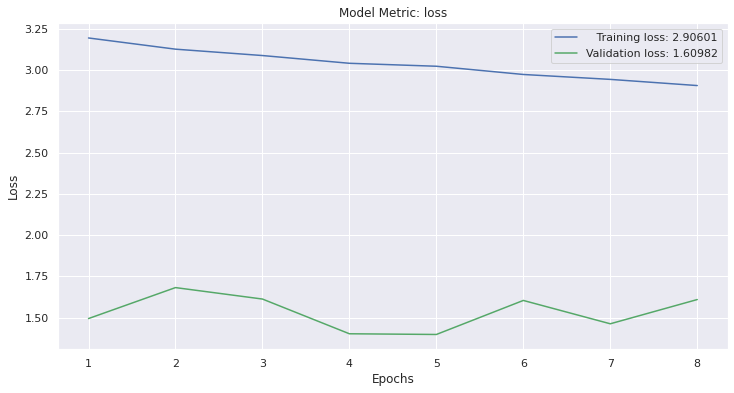

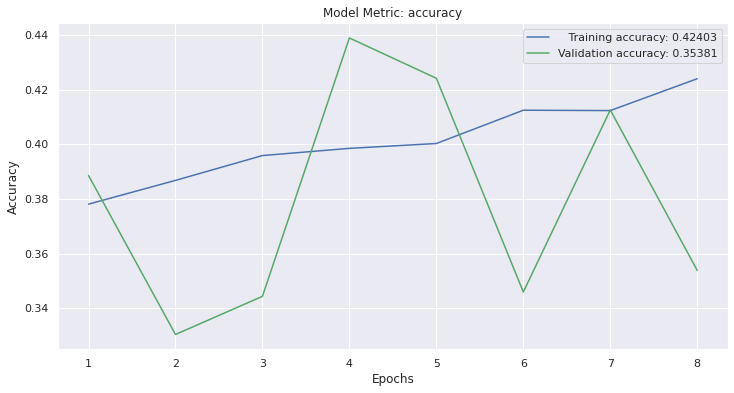

In [ ]:
plot_keras_history(history_model_agru)

**BEST MODELS' RESULTS PER PREDICTED FEATURE**

In [ ]:
import plotly.express as px
fig = px.bar(
    x=["Gender","Ethnicity", "Age"],
    y=[ model_g.evaluate(X_test_g, y_test_enc_g, verbose=1)[1], model_e.evaluate(X_test_e, y_test_e)[1] , model_aa.evaluate(X_test_a, y_test_enc_a, verbose=1)[1]],
    labels={'x': "", 'y': "Accuracy"},
    color=[ "Gender","Ethnicity", "Age"],
    title="Best Models' Performance"
)

fig.show()

119/119 [==============================] - 0s 4ms/step - loss: 1.0698 - accuracy: 0.5658


In [ ]:
# BIDERICTIONAL GRU
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input,Bidirectional,LSTM,Lambda, GRU
# from tensorflow.keras.layers import Permute,GlobalMaxPool1D,Concatenate, Dense, BatchNormalization, Dropout, GlobalAveragePooling1D
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# input_ = Input(shape=(48,48,1))
# lambda_ = Lambda(lambda x: tf.squeeze(x,axis=3))(input_)

# lstm_ = Bidirectional(GRU(8,activation='relu',return_sequences=True))(lambda_)

# permute_=Permute((2,1),input_shape=(48,48))(lambda_)
# lstm_2 = Bidirectional(GRU(8,activation='relu',return_sequences=True))(permute_)


# lstm_ = BatchNormalization()(lstm_)
# maxpool1 = GlobalMaxPool1D()(lstm_)


# lstm_2 = BatchNormalization()(lstm_2)
# maxpool2 = GlobalMaxPool1D()(lstm_2)


# concat_ = Concatenate(axis=1)([maxpool1,maxpool2])
# dense_1 = Dense(20,activation='relu')(concat_)
# output_ = Dense(2,activation='softmax')(dense_1)

# model = Model(input_,output_)

# model.compile(
#     loss=categorical_crossentropy,
#     optimizer=Adam(),
#     metrics=['accuracy', 'binary_accuracy'])

# es = EarlyStopping(
#     monitor   = 'val_loss', # which metric we want to use as criterion to stop training
#     min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
#     patience  = 3, # we 3 epochs before stopping
#     verbose   = 1, # verbosity level
#     mode      = 'auto',
#     restore_best_weights = True)

# model.fit(
#     X_train,
#     y_train,
#     batch_size = 135,
#     epochs = 100,
#     verbose = 1,
#     validation_split = 0.1,
#     callbacks = [es])

* Trial of changing pictures' size, for implementing more architectures on the uncoloured dataset (failed due to memory capacity even in gpu)

In [ ]:
# import cv2

# pixels_3d = []

# for image in df['pixels']:
#   #pixel3d = cv2.resize(image,(48,48),3)
#   pixel3d = cv2.resize(image,(256,256),3)
#   pixels_3d.append(pixel3d)
  
# loss='sparse_categorical_crossentropy',